In [1]:
from datetime import datetime
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from dataset import CustomDataset

In [2]:
N = 200
k = 50

In [3]:
# N= 200
# k = 50
# EPOCHS = 20

# Zwiększenie danych (więcej wierszy w pliku) +
# batch_size (50 daje gorsze wyniki niż 20, a 10 daje jeszcze lepsze, dla 1 gorsze i bardzo wydłuża się czas liczenia) +
# lr = 0,01 (bardzo słabe wyniki) -
# momentum = 0,5 (gorsze wyniki) -
# zmiana ukrytej warstwy (trochę lepsze wyniki) +

In [4]:
class LVPredictorNetwork(nn.Module):
    def __init__(self):
        super(LVPredictorNetwork, self).__init__()
        
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2 * N, N + k, bias=False).double(),
            nn.ReLU(),
            nn.Linear(N + k, (N + k)//2, bias=False).double(),
            nn.ReLU(),
            nn.Linear((N + k)//2, 2 * k, bias=False).double(),
            nn.ReLU(),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x.to('cpu'))
        return logits

In [5]:
training_data = CustomDataset("dane_treningowe_20000.csv", N, k)
test_data = CustomDataset("dane_treningowe_100.csv", N, k)

batch_size = 10
batch_num = len(training_data)//batch_size
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

model = LVPredictorNetwork()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [7]:
def train_one_epoch(epoch_index, tb_writer, batch_num=batch_num):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting

    for i, data in enumerate(train_dataloader):
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % batch_num == batch_num - 1:
            last_loss = running_loss / batch_num  # loss per batch
            print('Średni błąd: ', last_loss)
            tb_x = epoch_index * len(training_data) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [8]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 20

best_validation_loss = 1_000_000.

EPOCH 1:
Średni błąd:  7.771860977775974


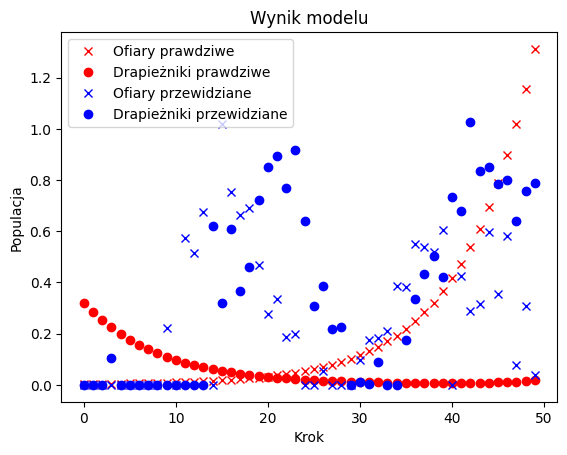

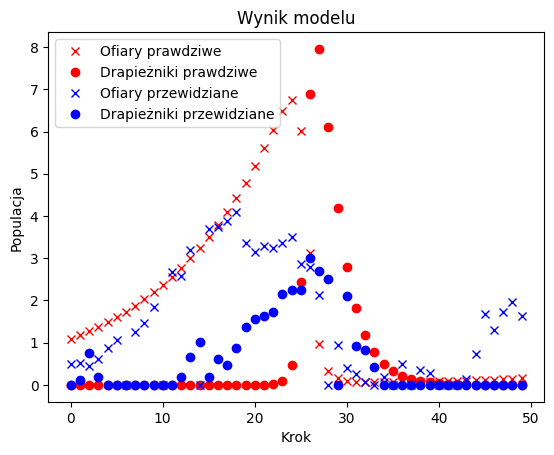

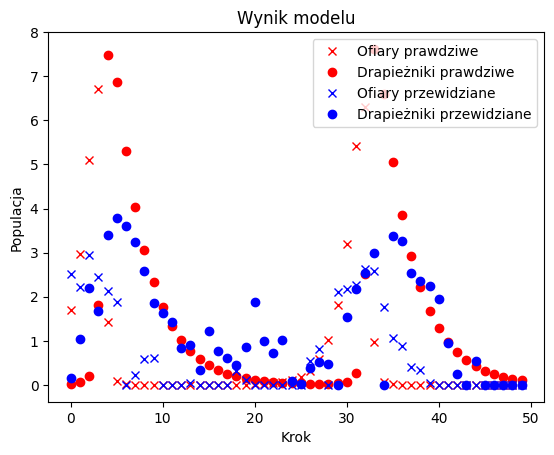

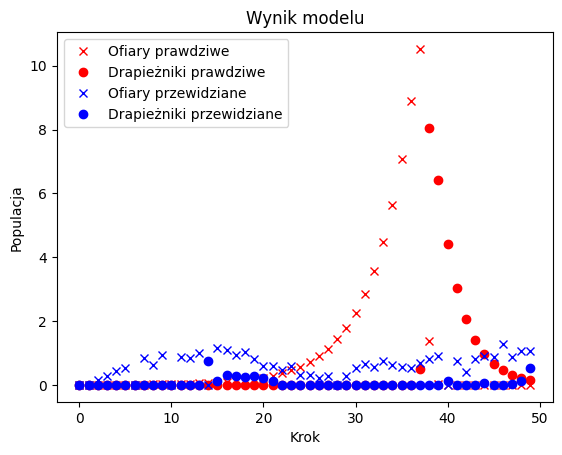

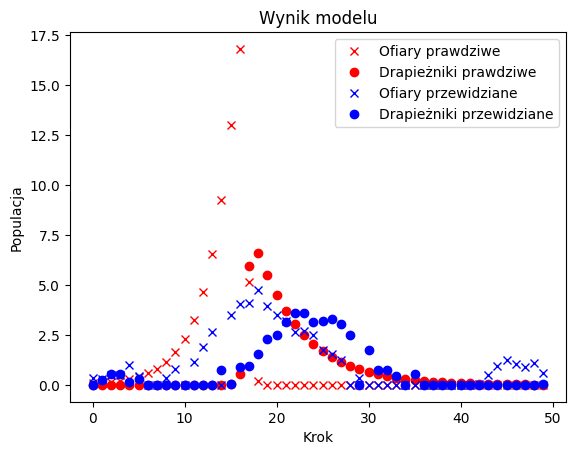

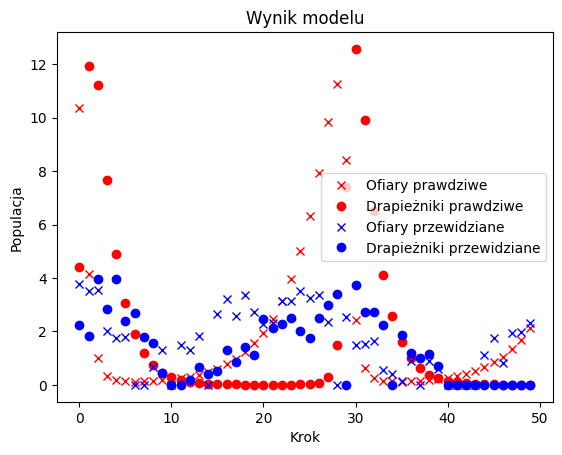

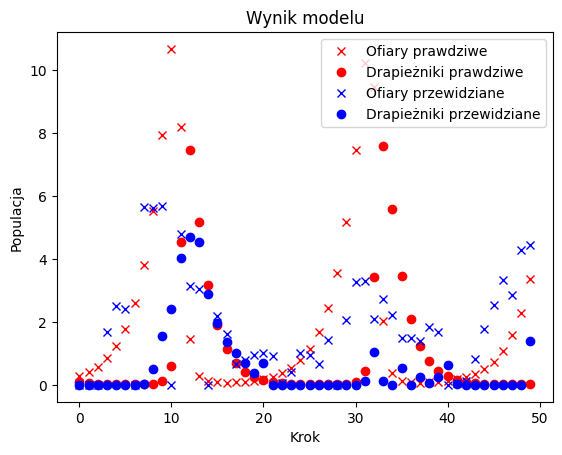

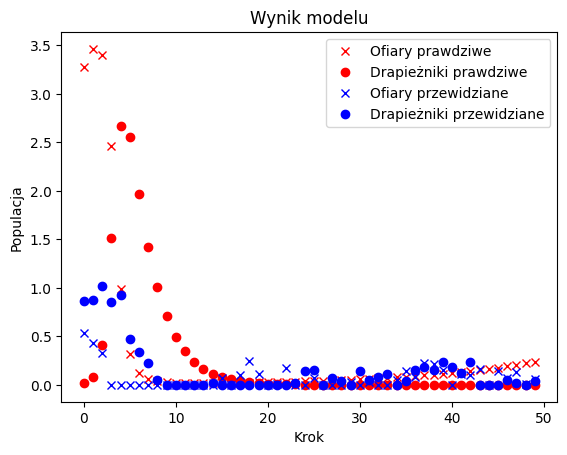

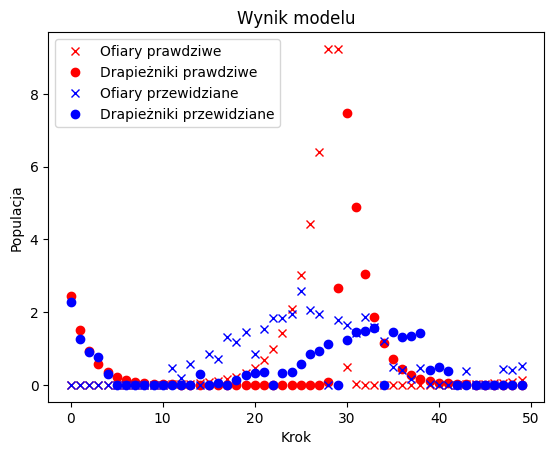

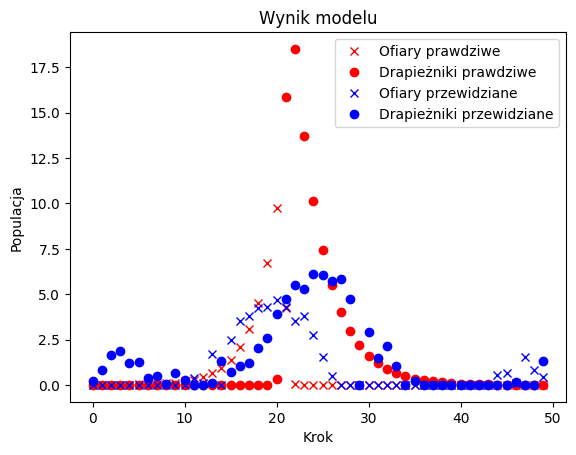

tensor(5.5008, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 2:
Średni błąd:  4.833349765287303


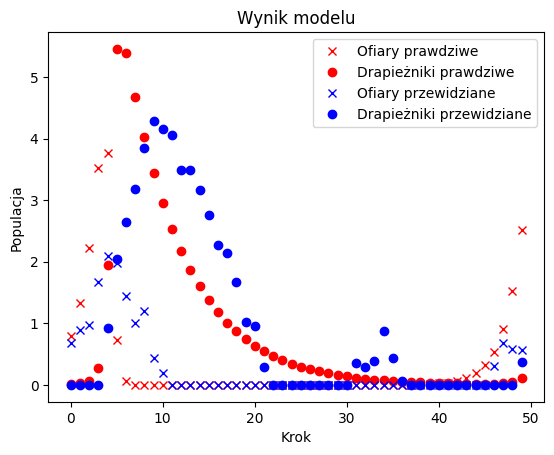

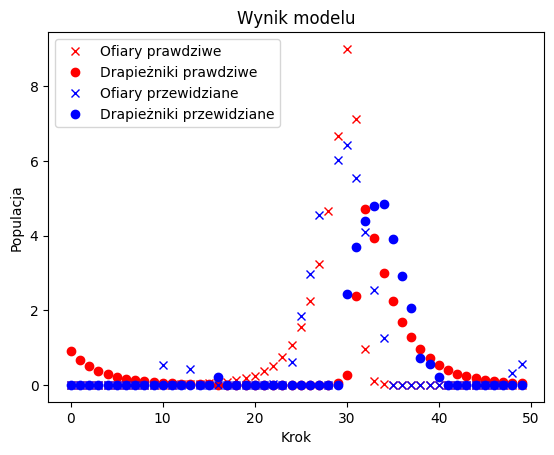

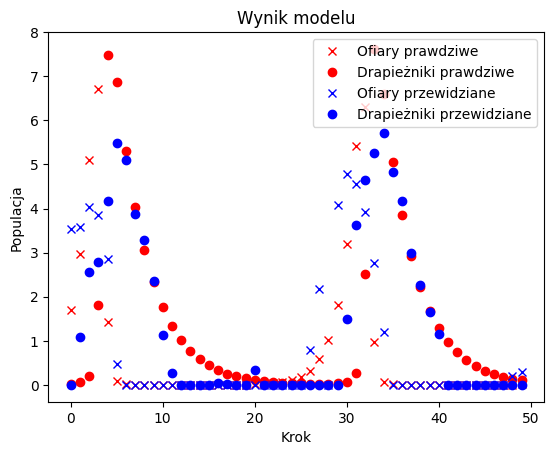

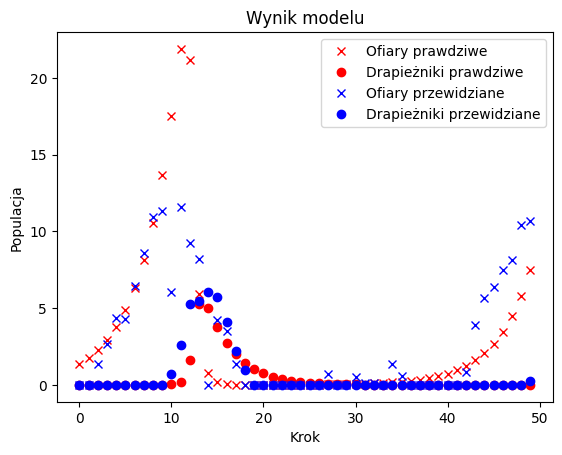

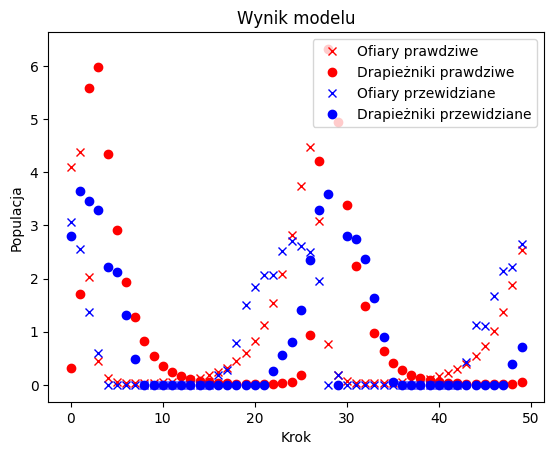

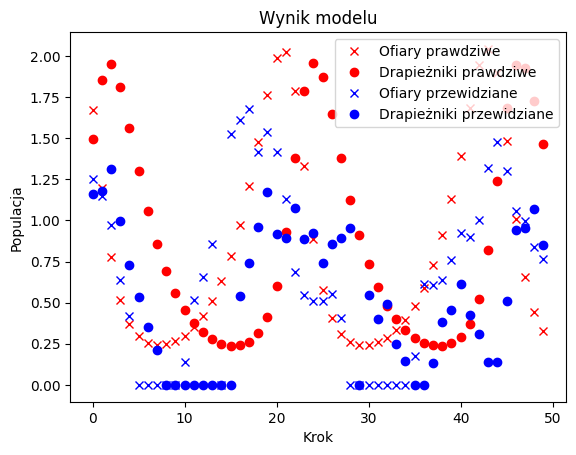

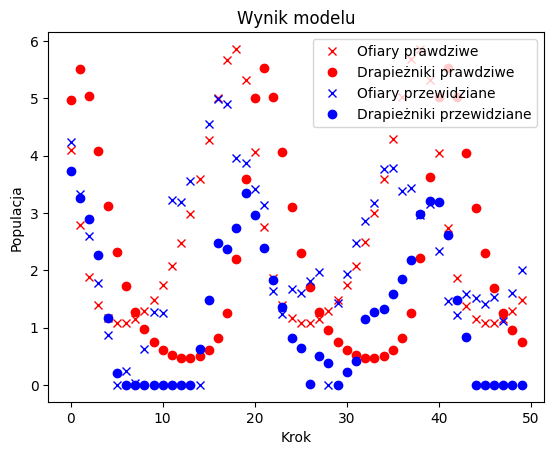

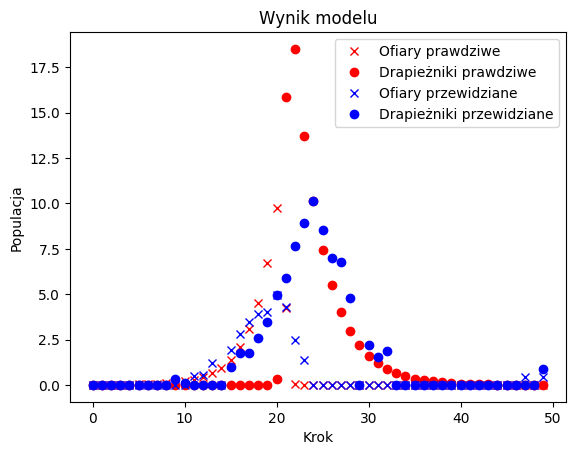

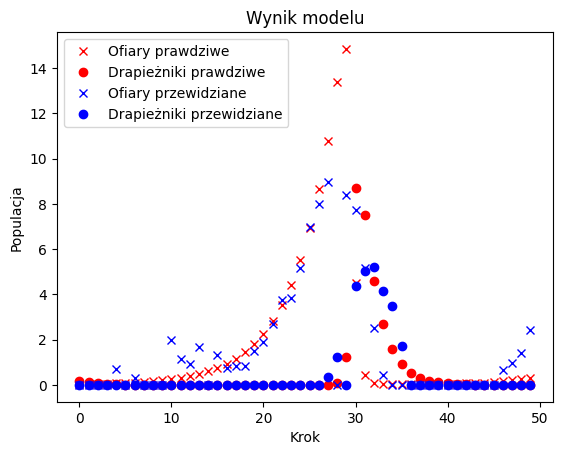

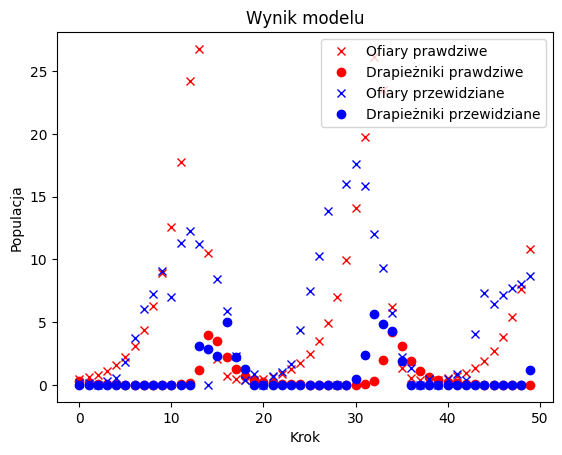

tensor(4.0877, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 3:
Średni błąd:  3.618842736331425


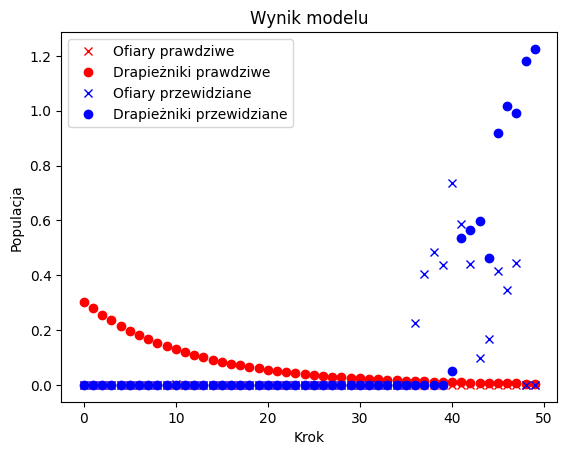

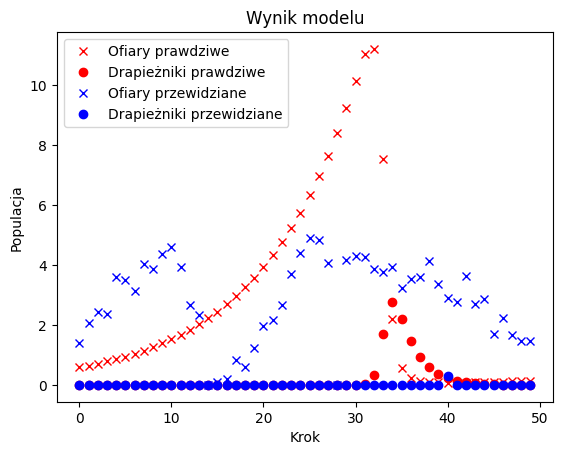

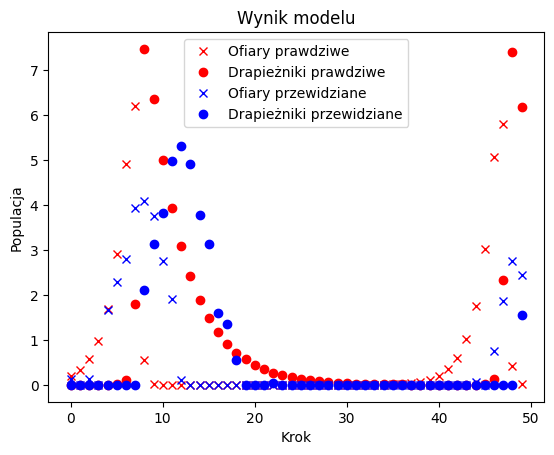

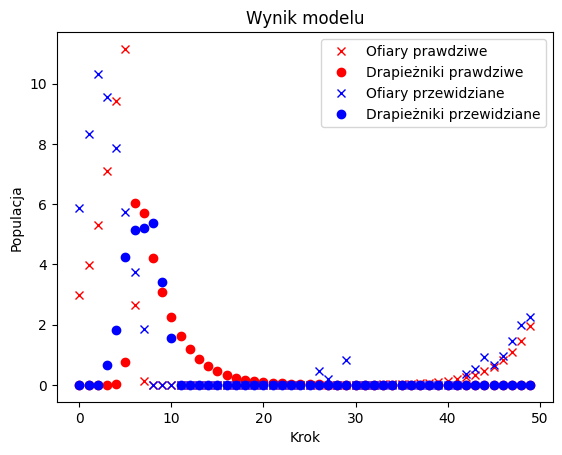

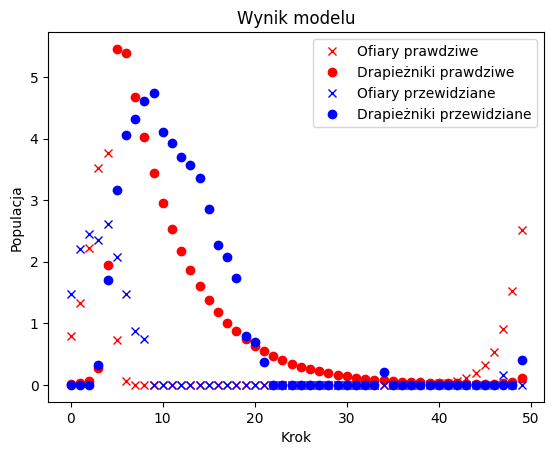

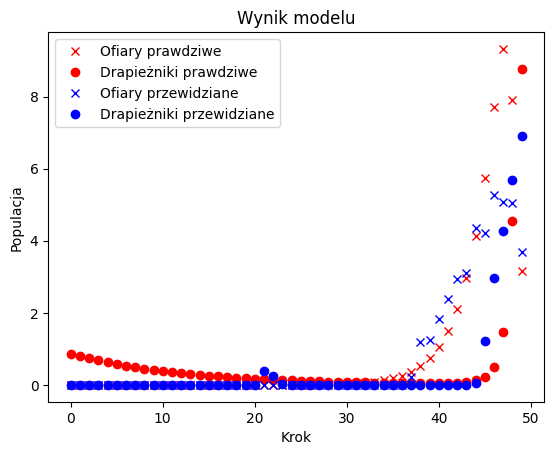

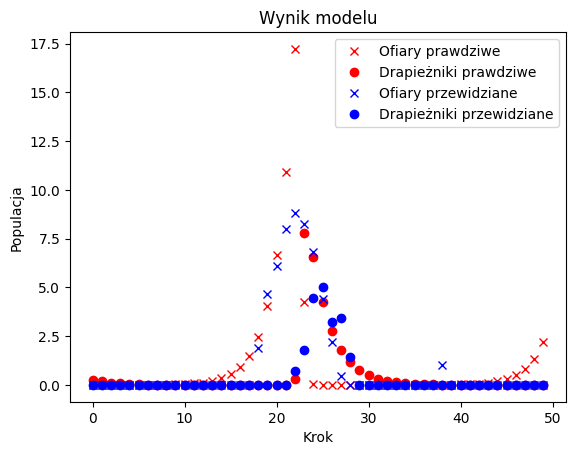

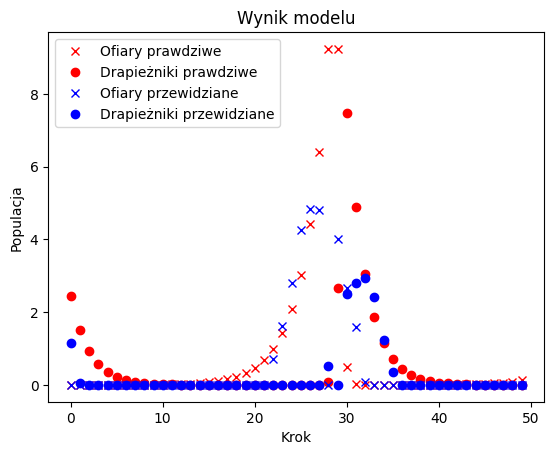

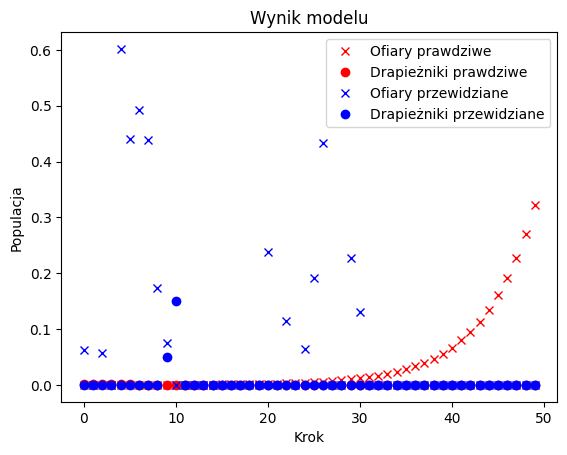

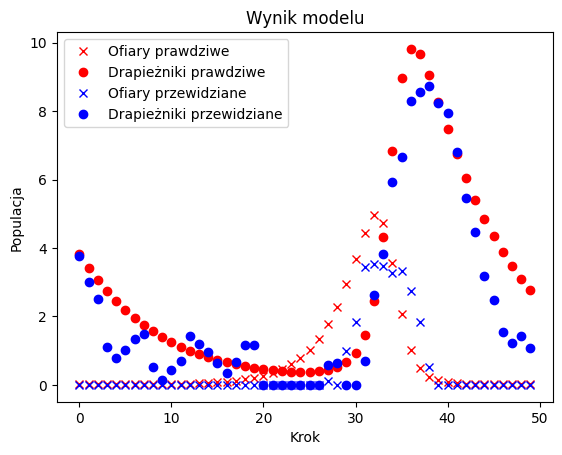

tensor(3.6453, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 4:
Średni błąd:  3.0425613178042425


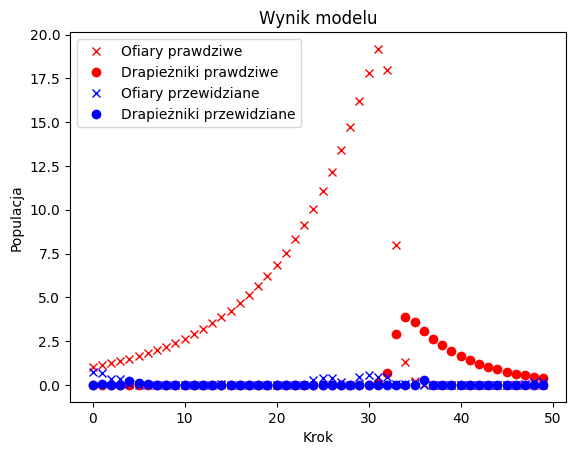

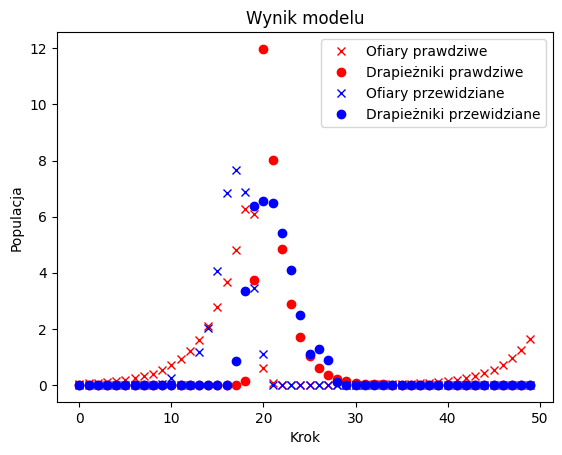

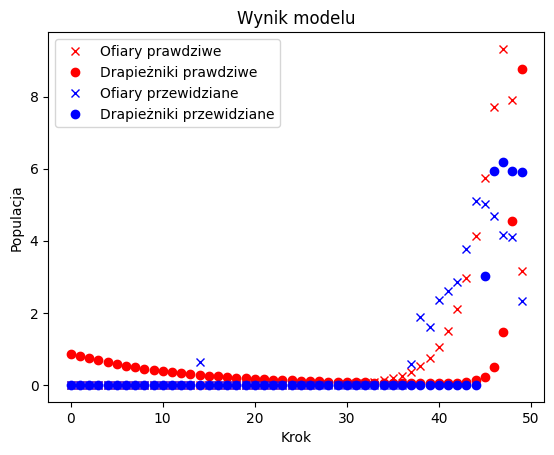

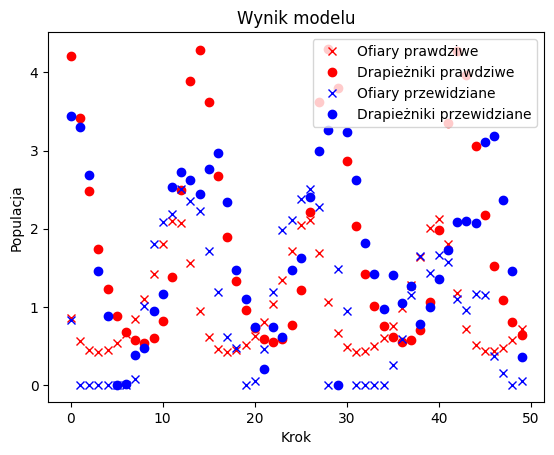

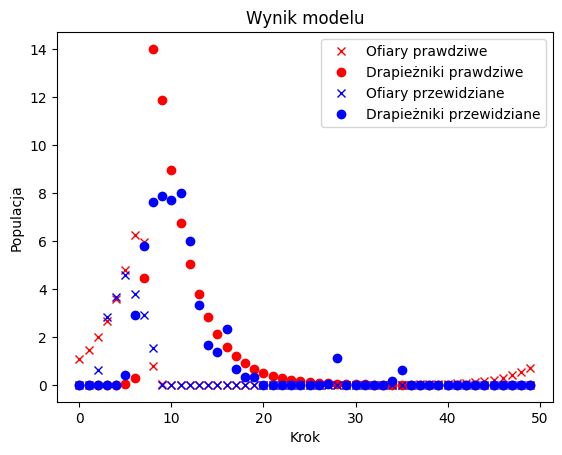

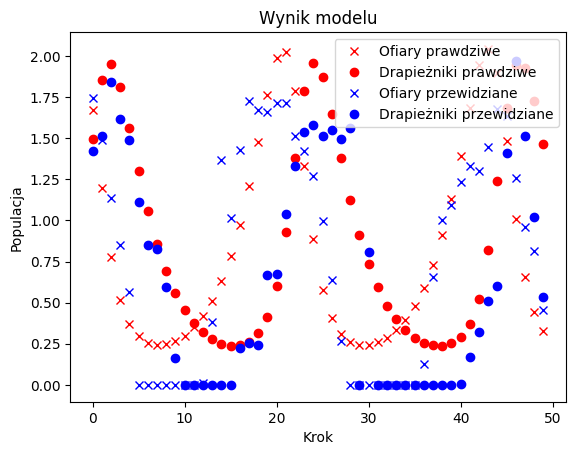

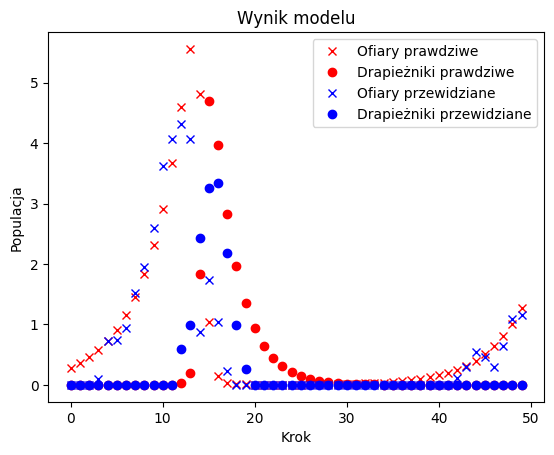

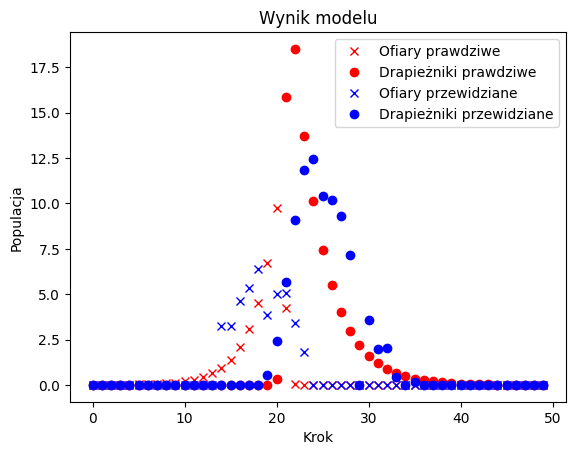

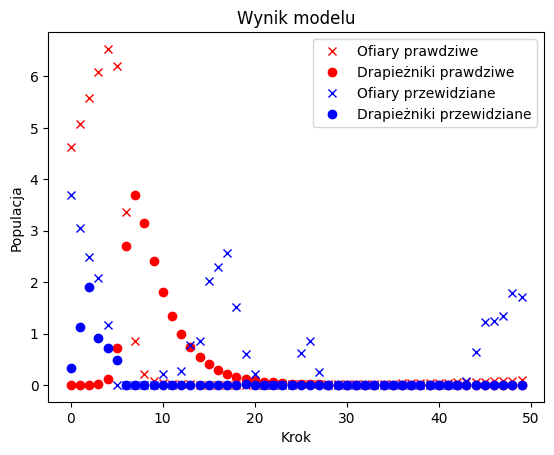

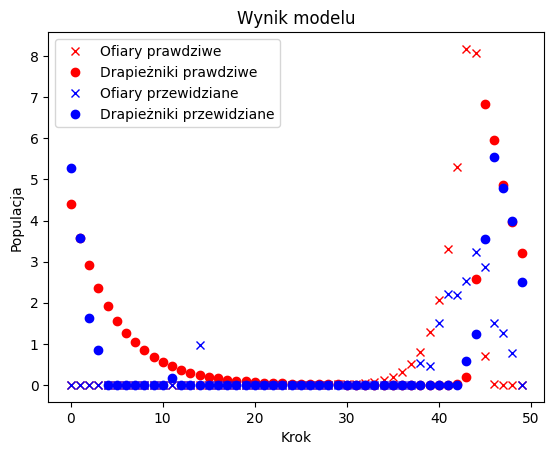

tensor(3.1267, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 5:
Średni błąd:  2.5951594264330136


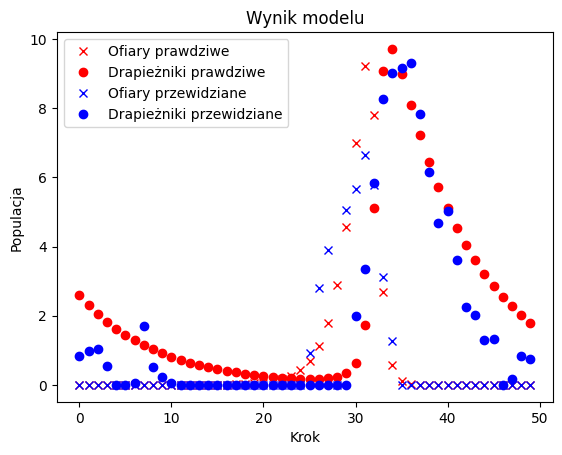

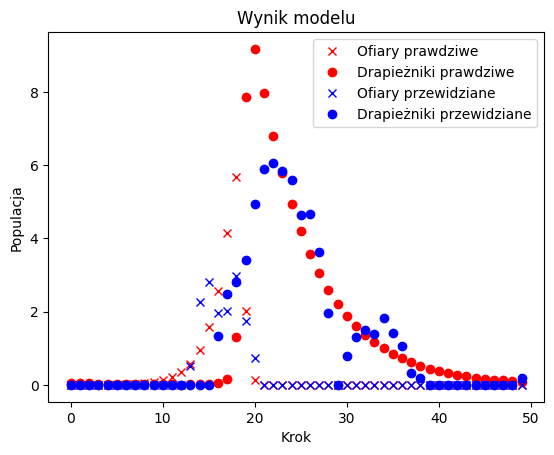

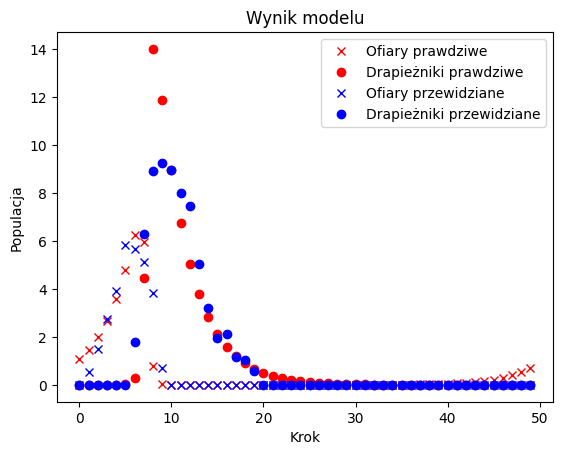

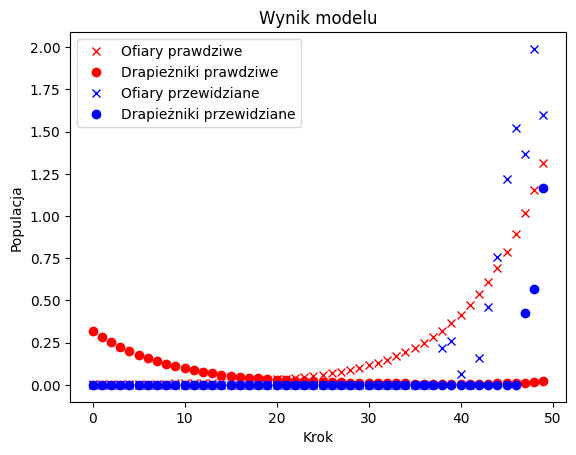

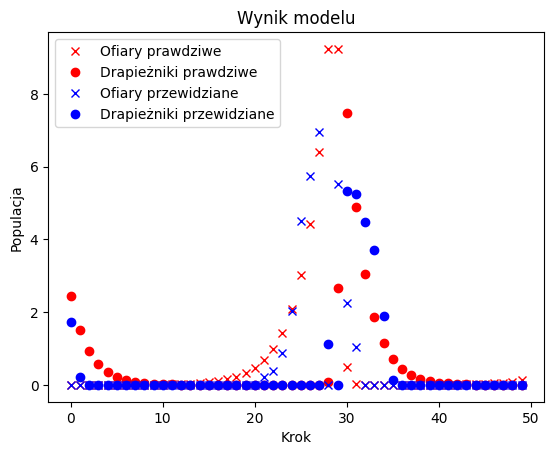

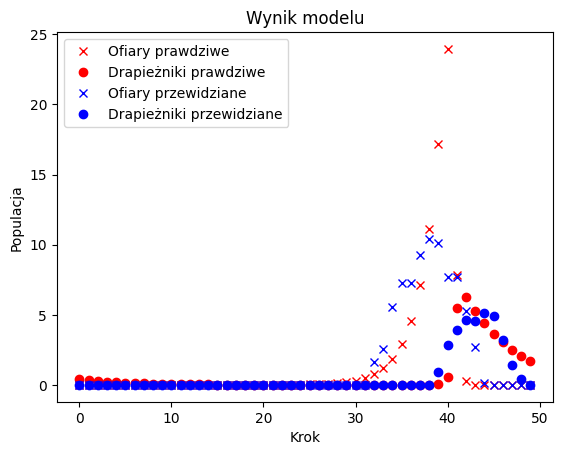

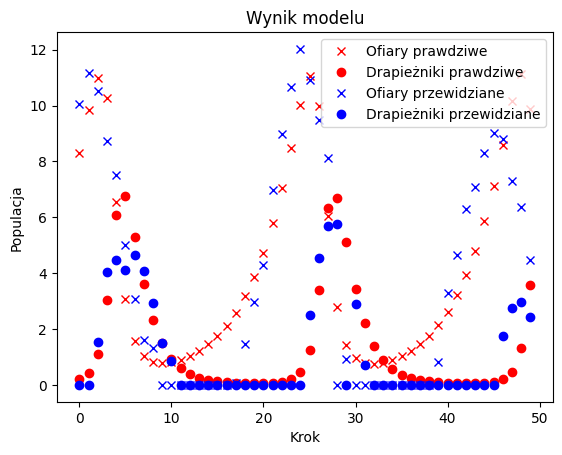

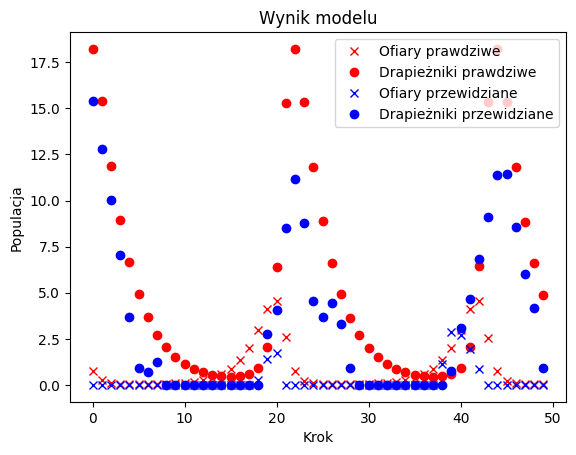

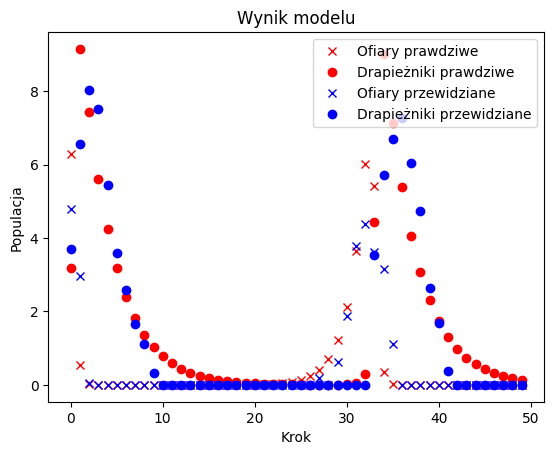

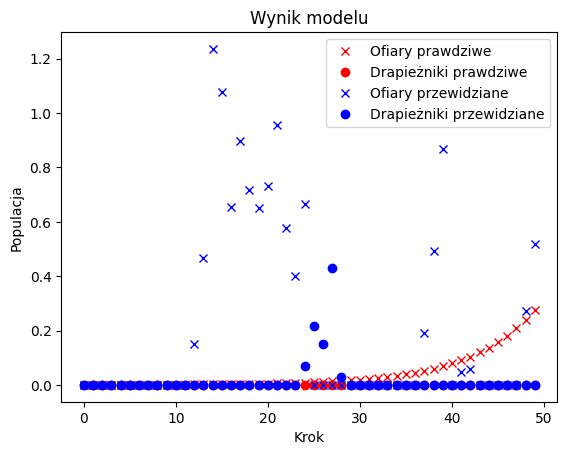

tensor(2.8236, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 6:
Średni błąd:  2.332040021826797


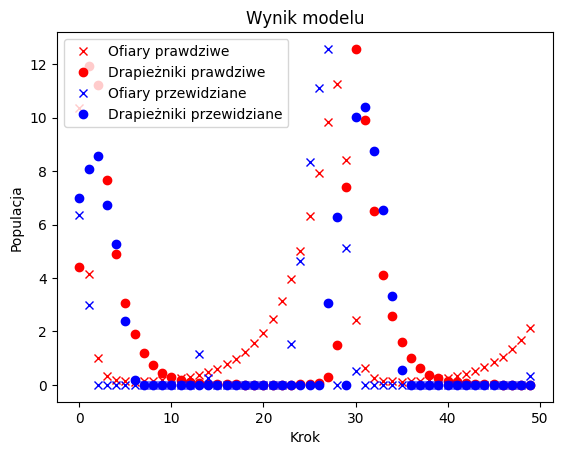

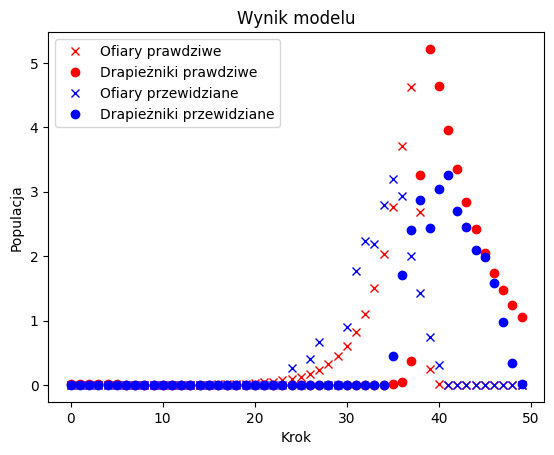

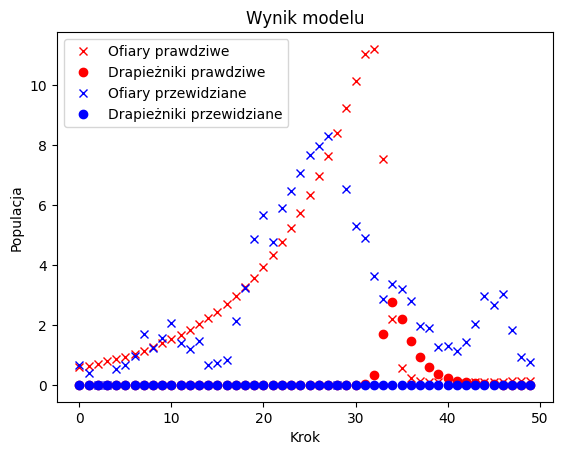

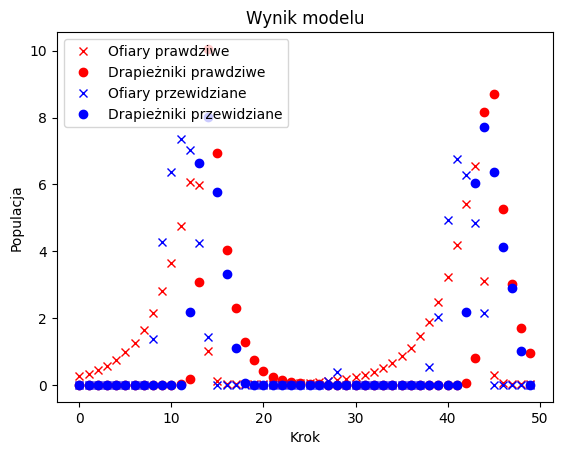

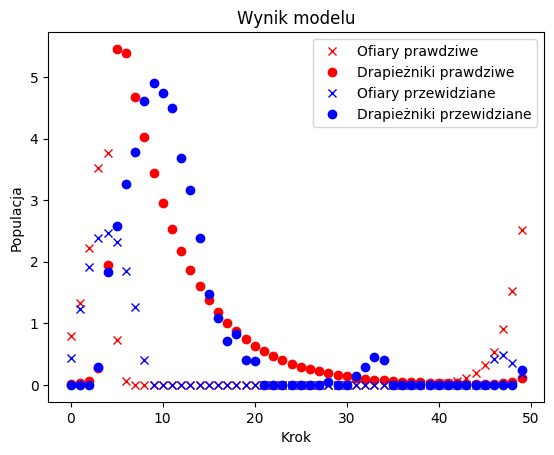

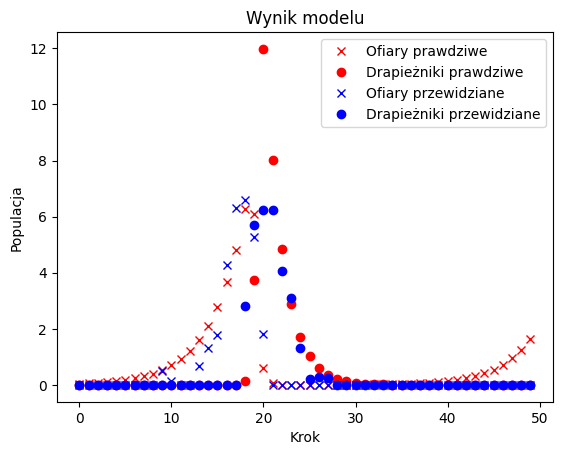

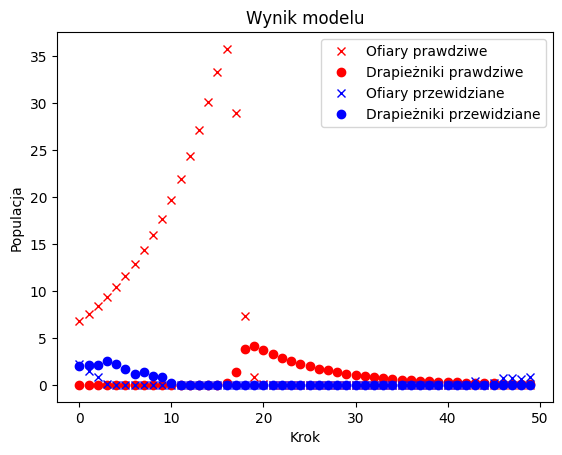

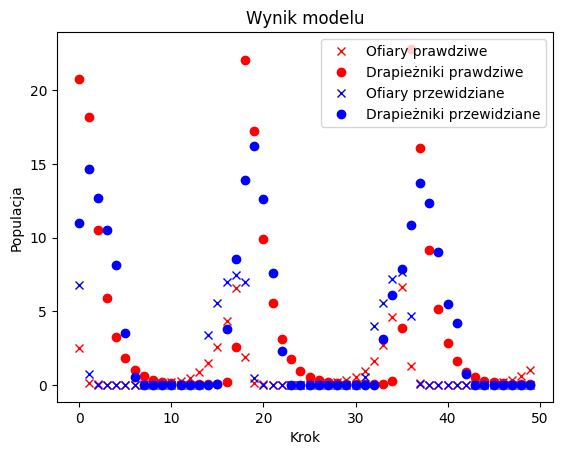

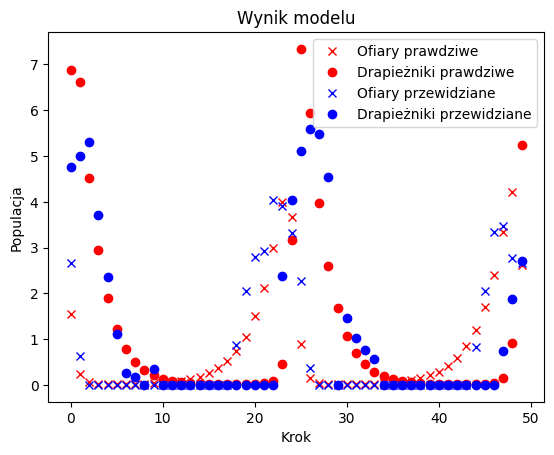

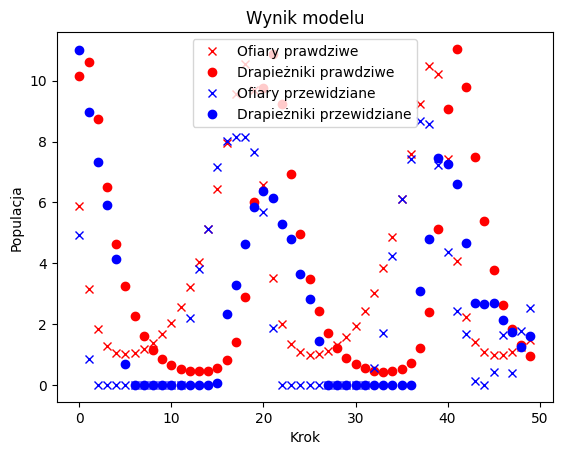

tensor(2.7067, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 7:
Średni błąd:  2.203037682791668


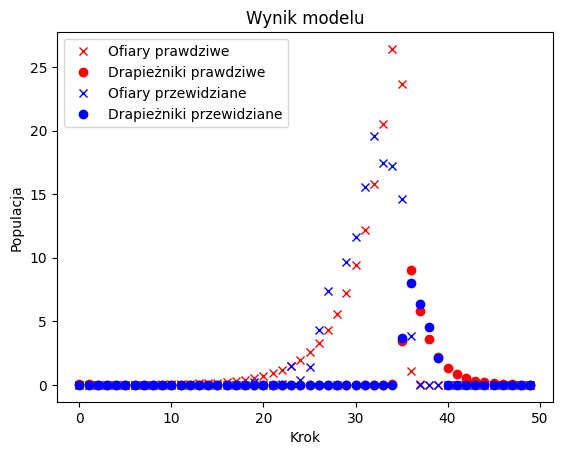

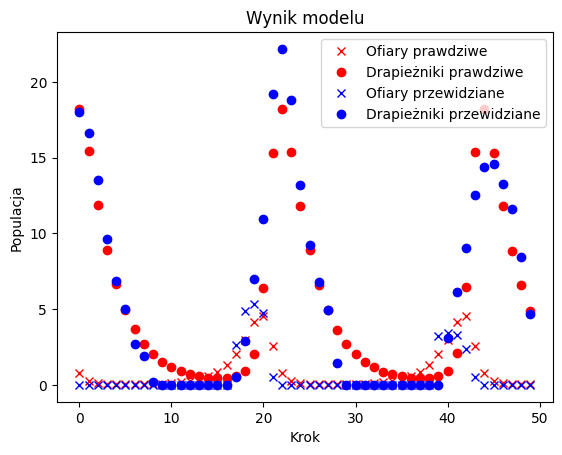

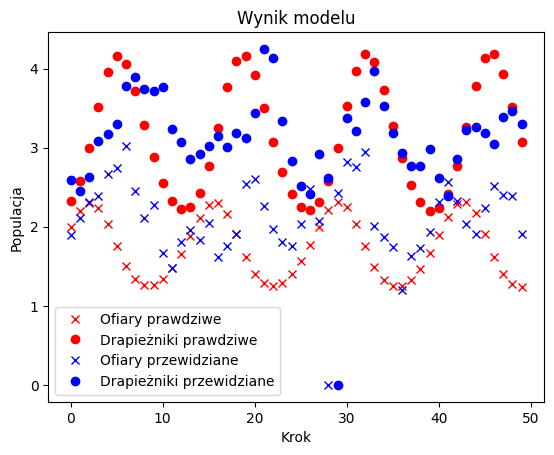

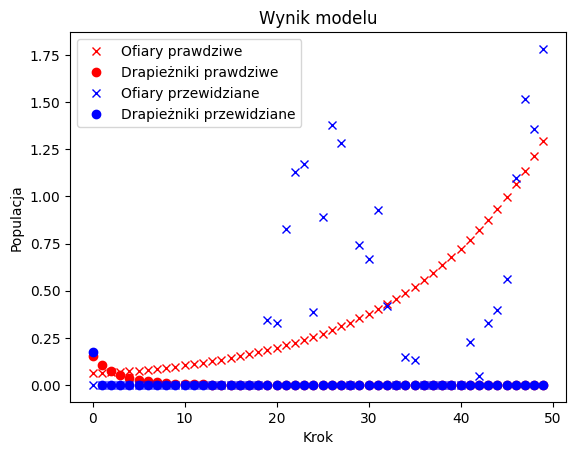

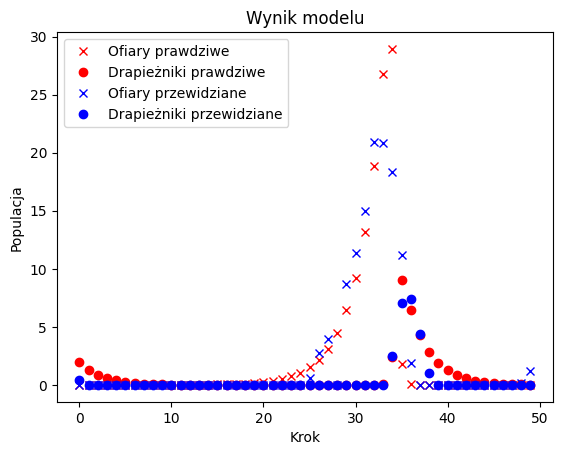

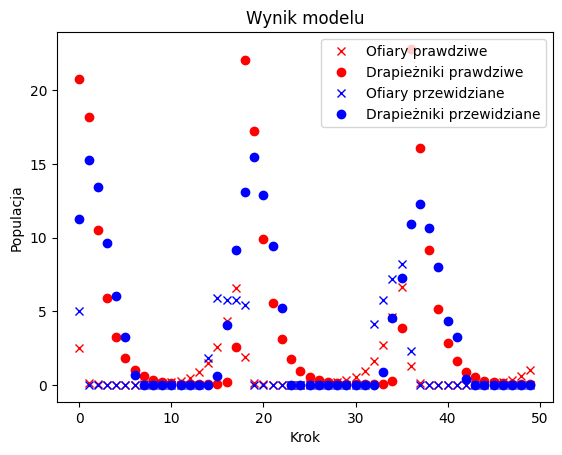

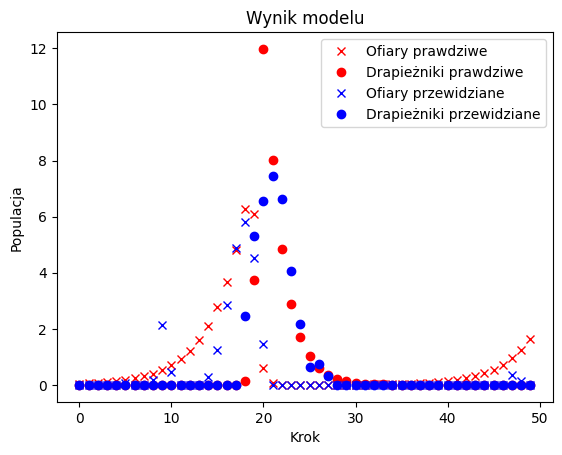

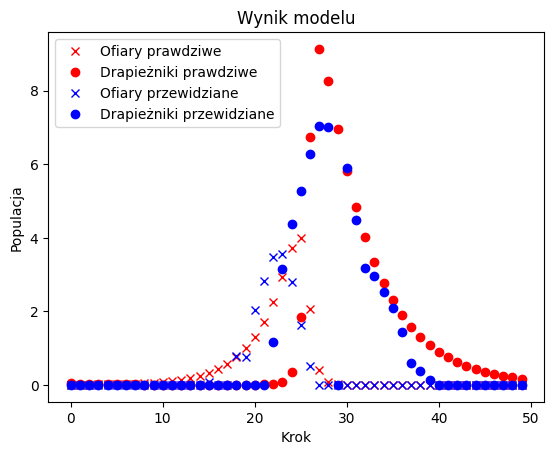

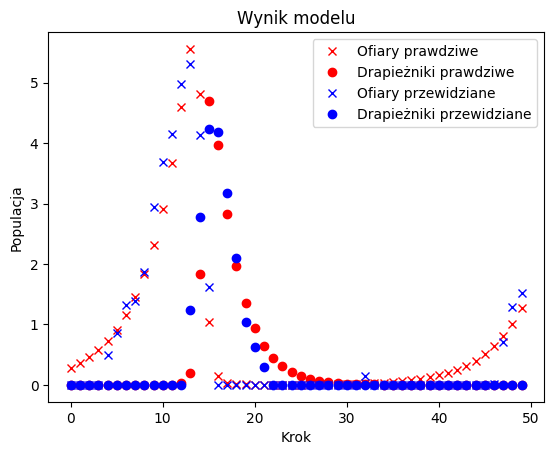

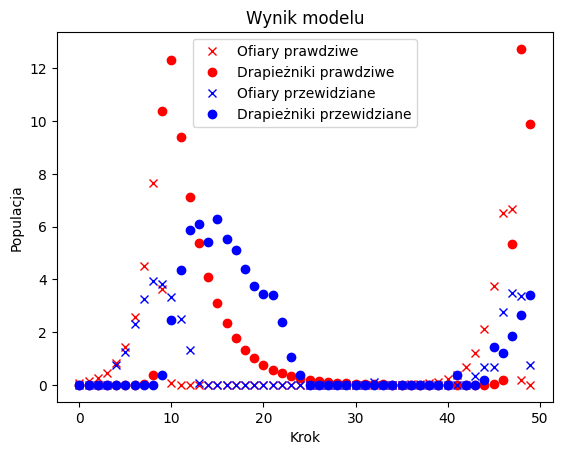

tensor(2.5077, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 8:
Średni błąd:  2.008395151351027


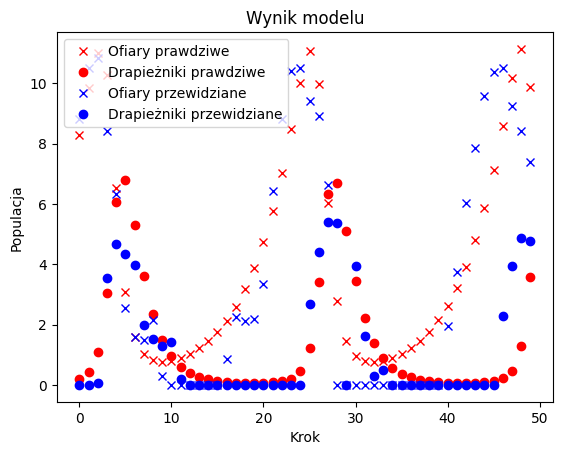

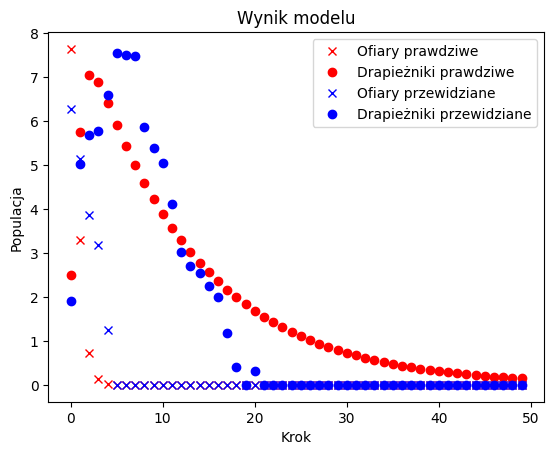

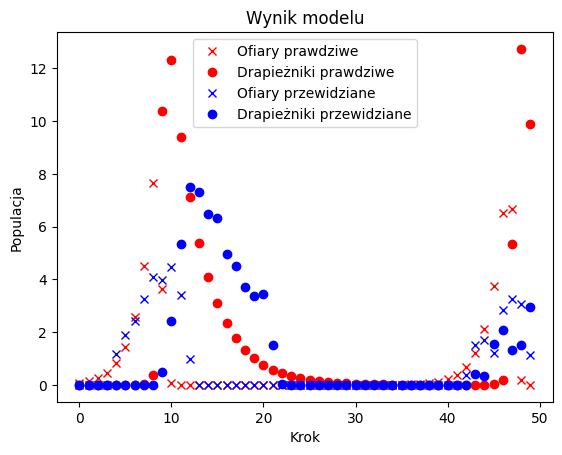

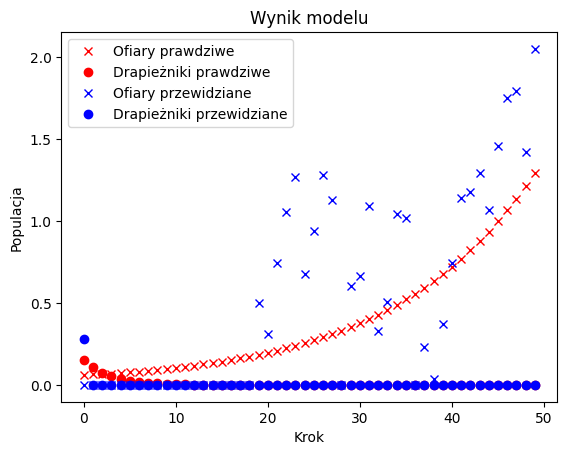

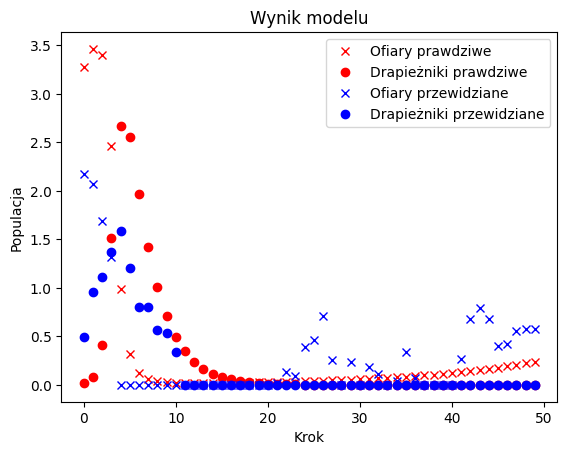

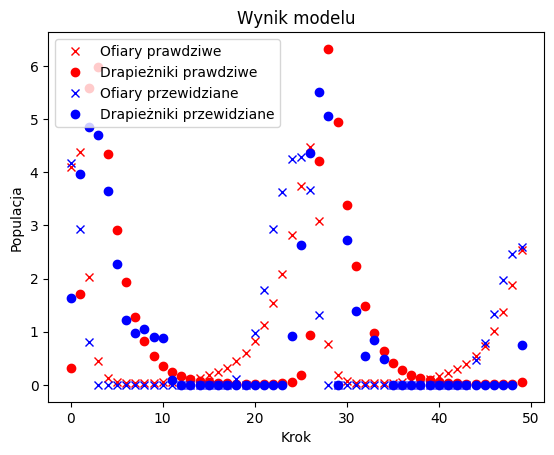

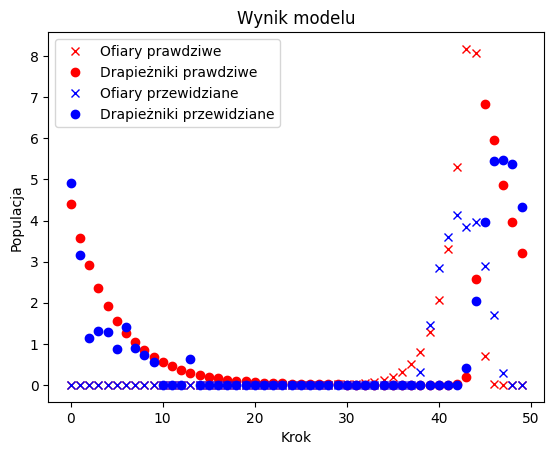

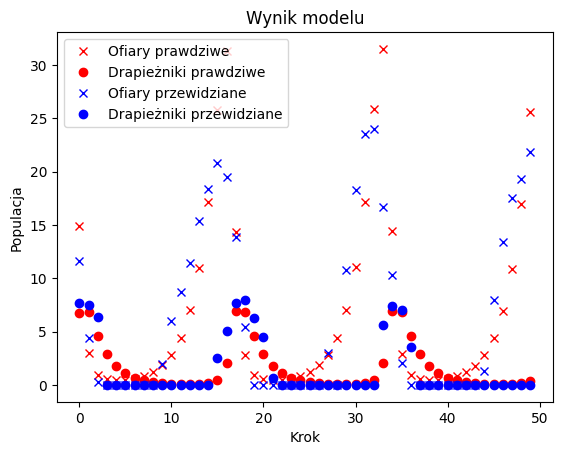

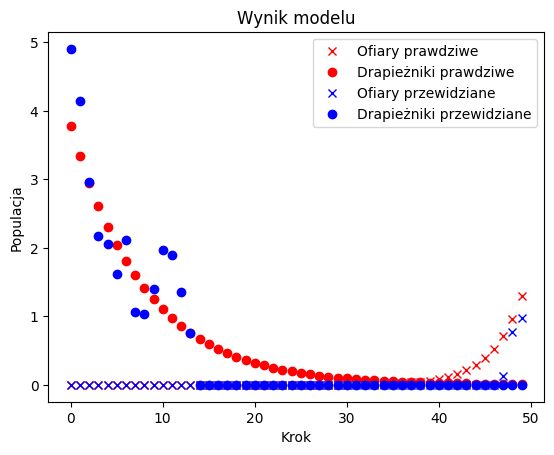

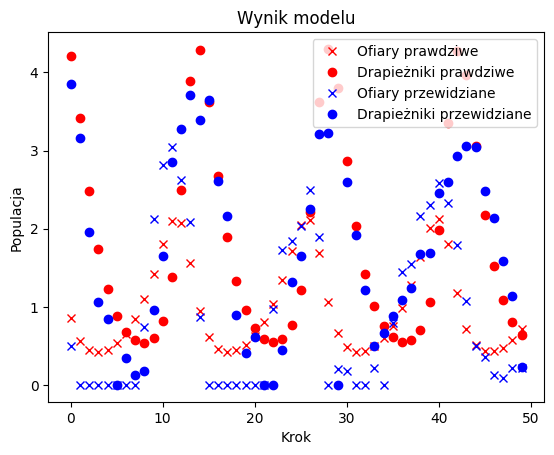

tensor(2.5135, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 9:
Średni błąd:  1.878049030715872


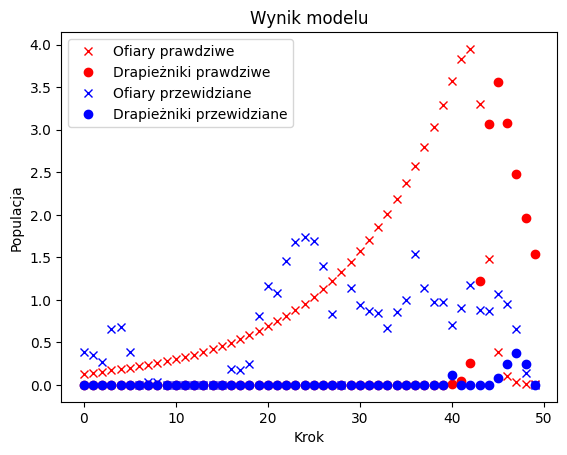

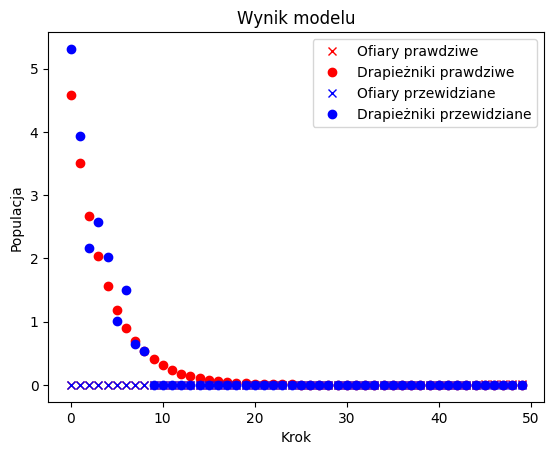

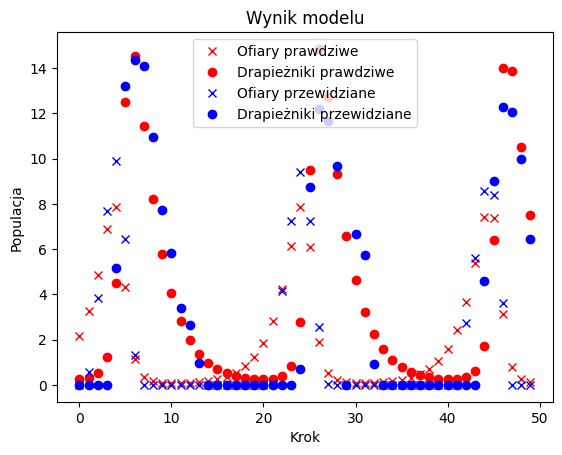

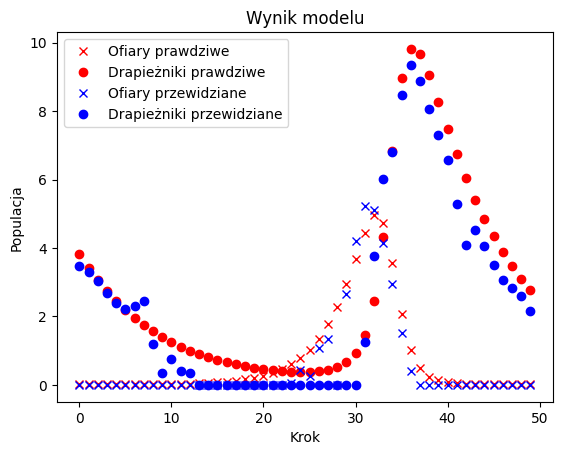

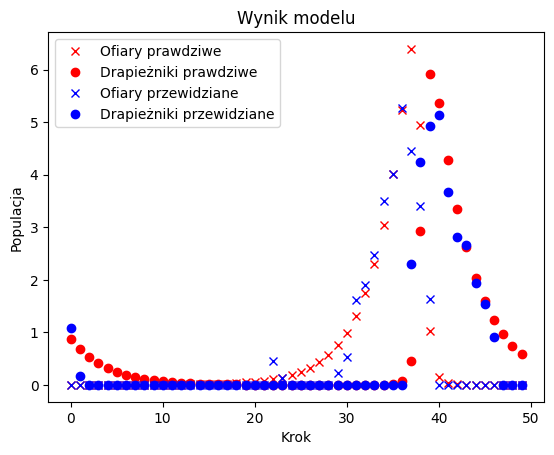

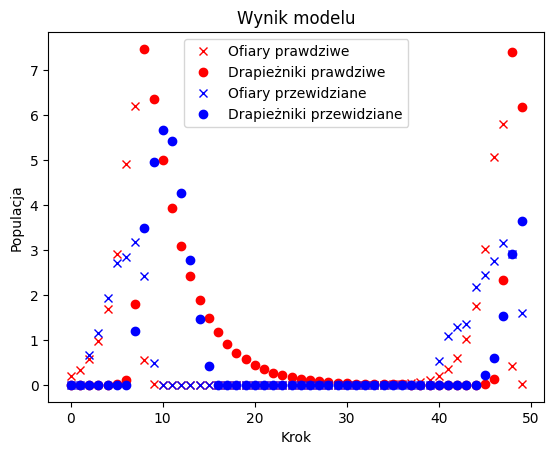

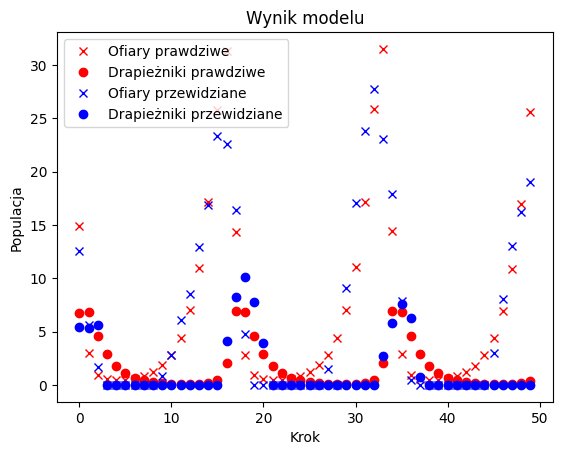

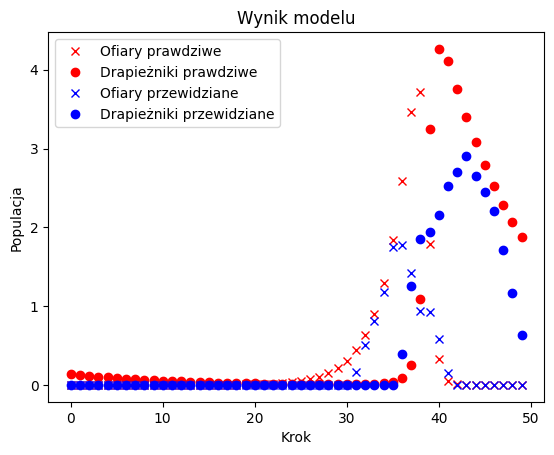

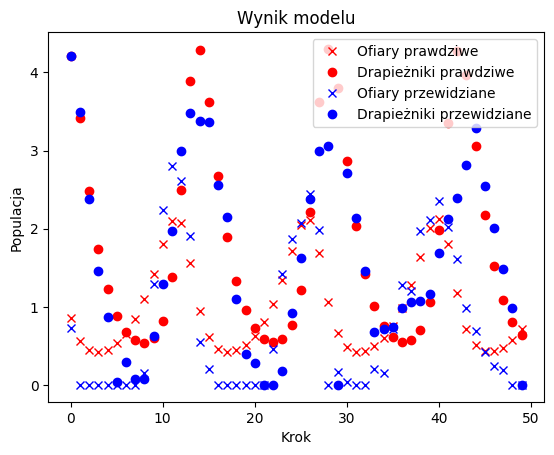

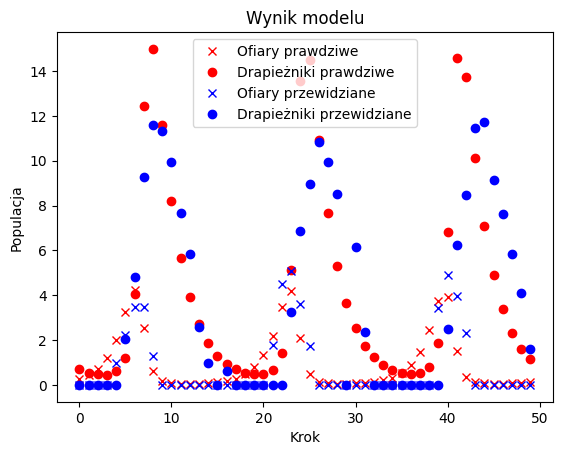

tensor(2.3828, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 10:
Średni błąd:  1.7660177616663266


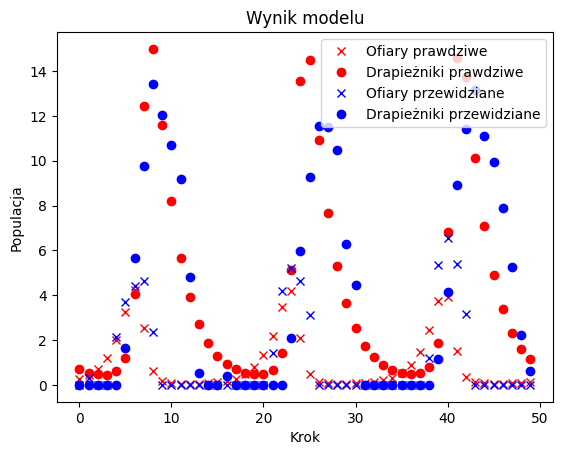

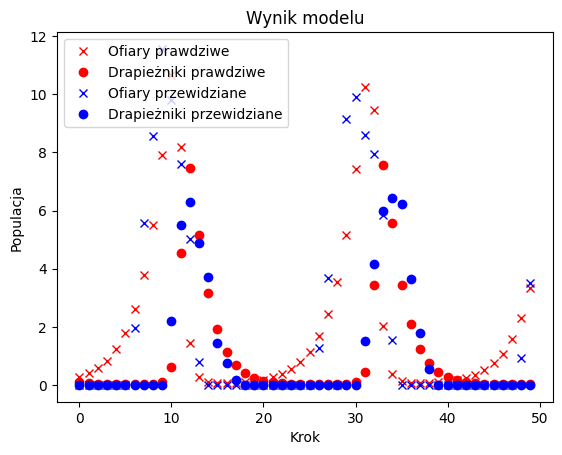

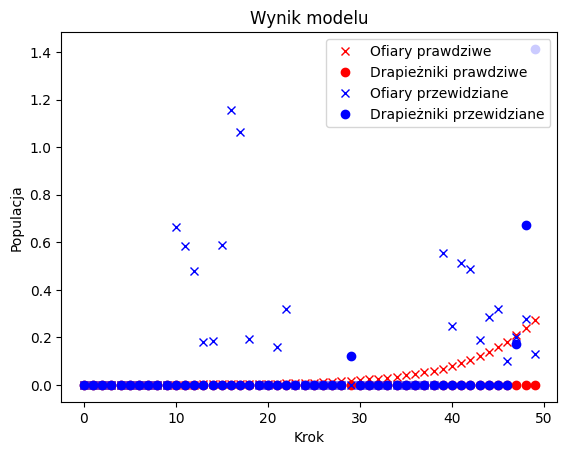

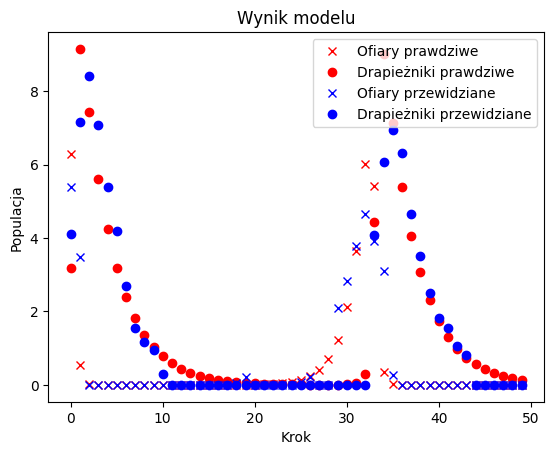

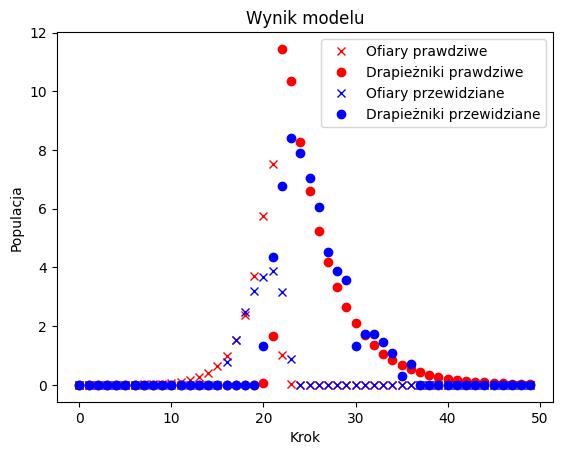

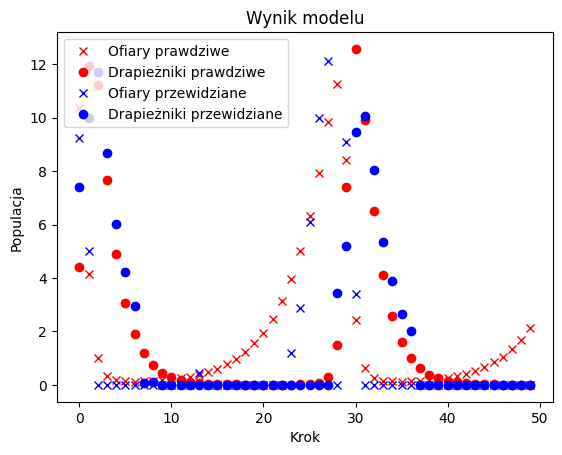

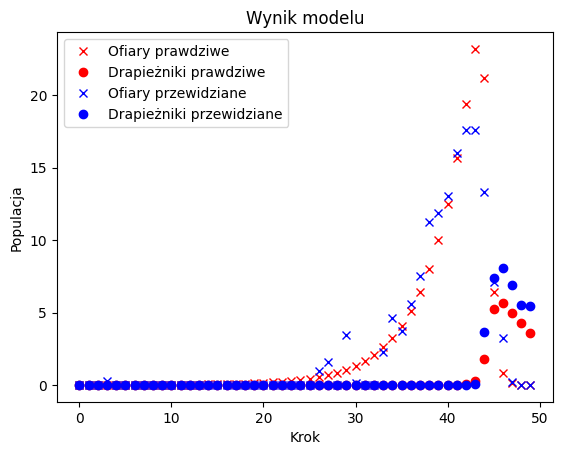

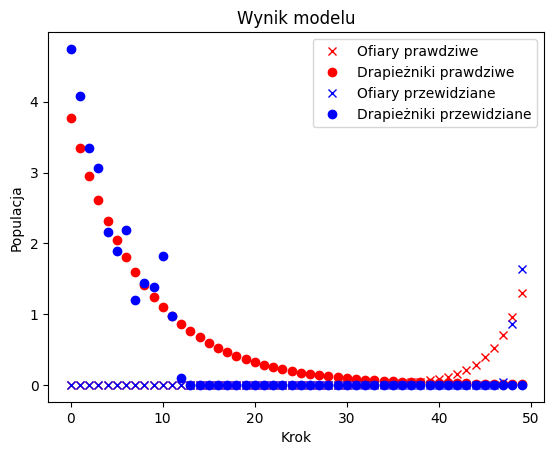

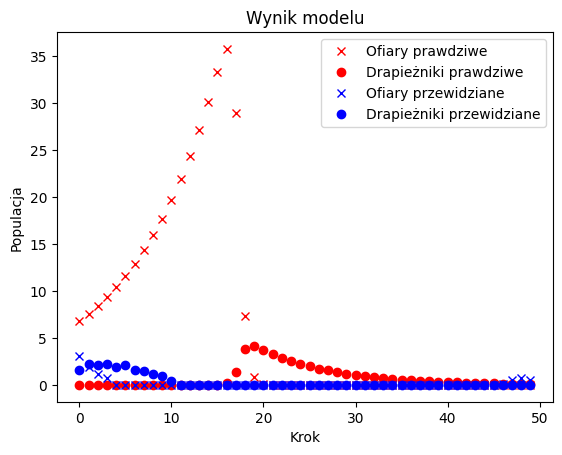

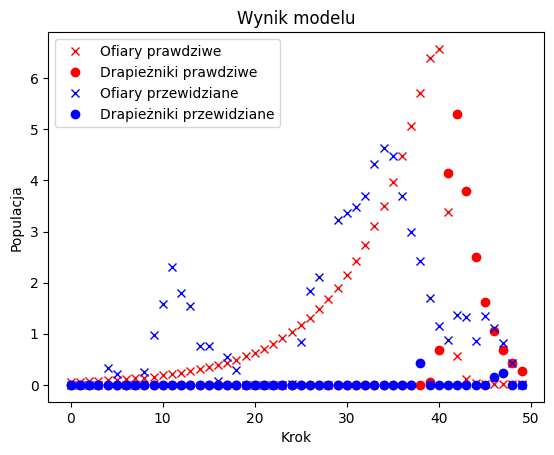

tensor(2.2569, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 11:
Średni błąd:  1.6306624923471265


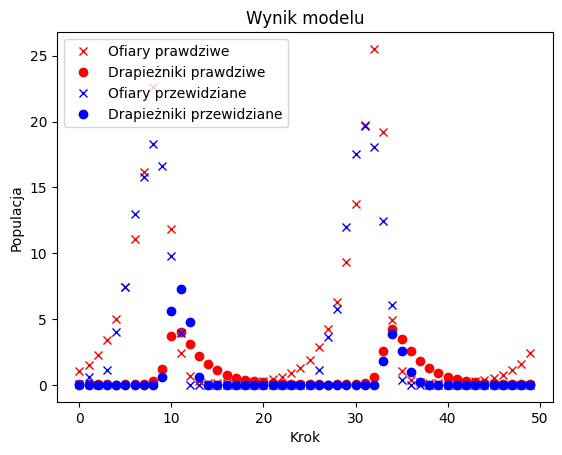

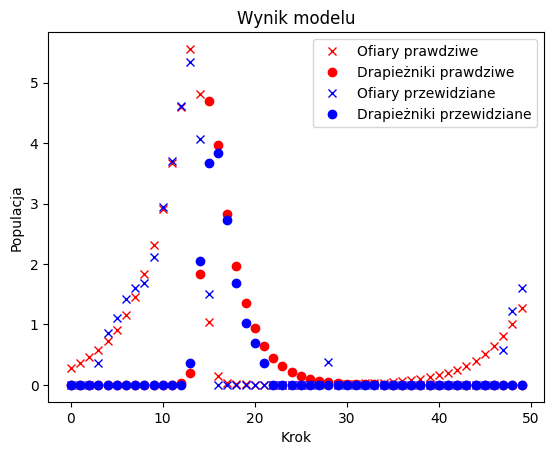

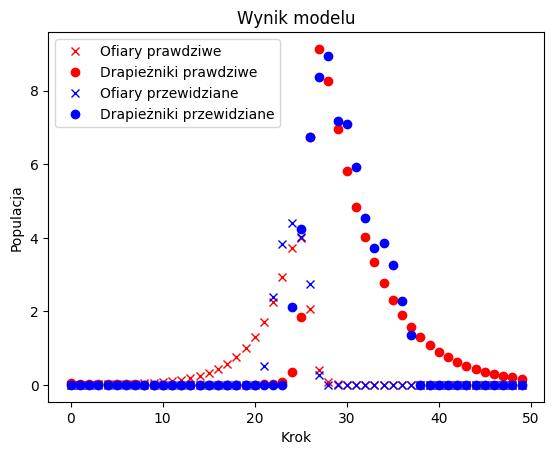

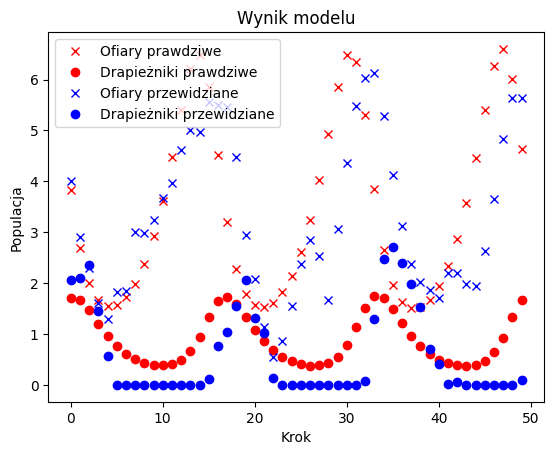

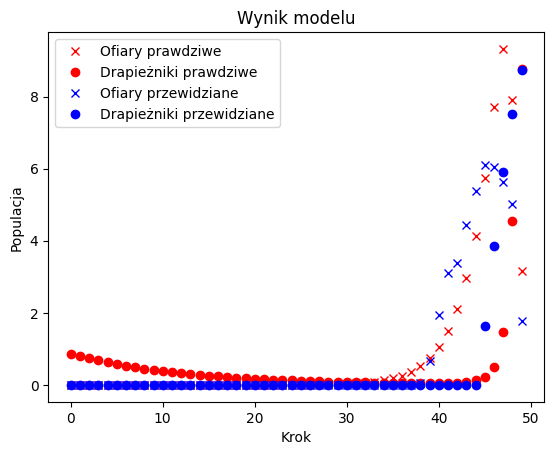

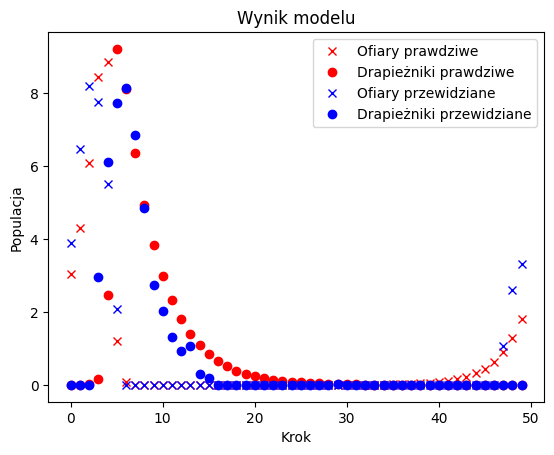

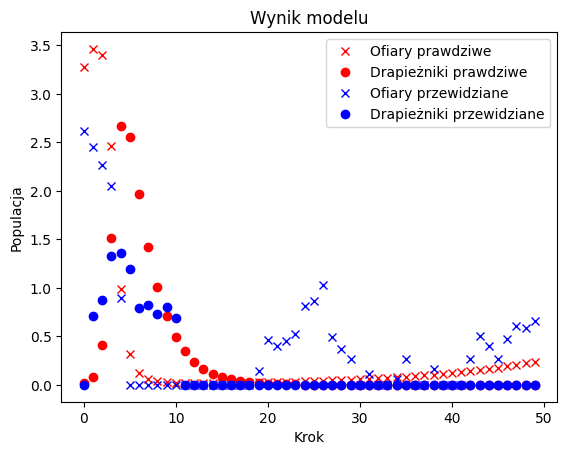

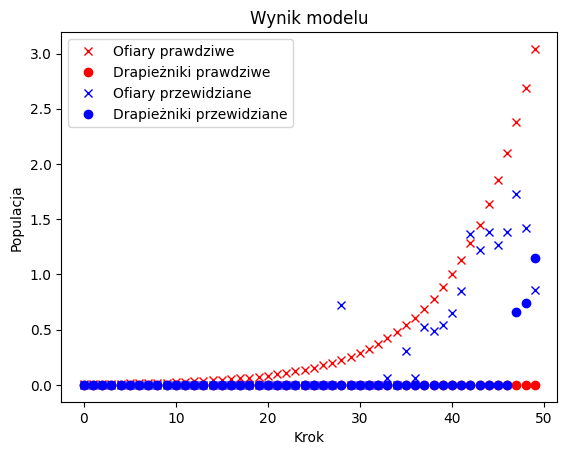

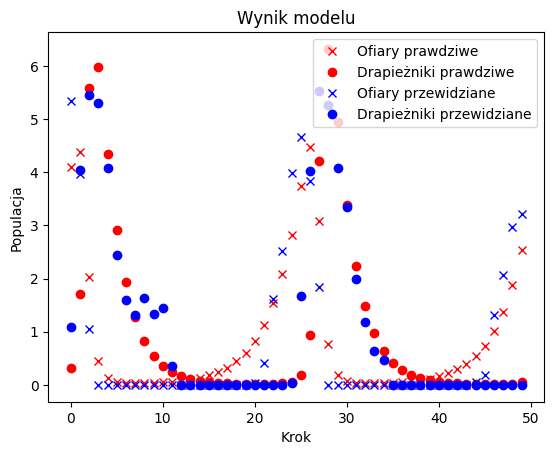

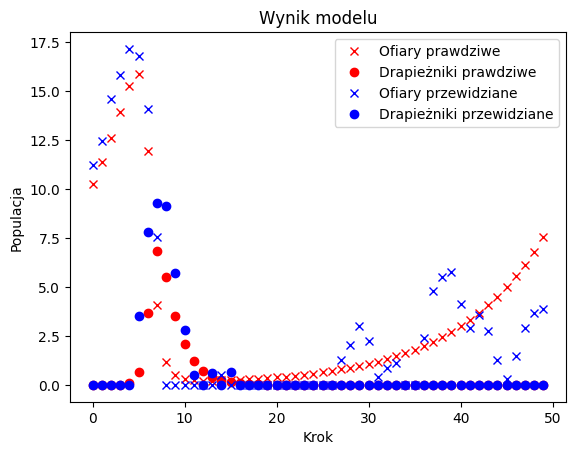

tensor(2.1640, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 12:
Średni błąd:  1.4598571404897218


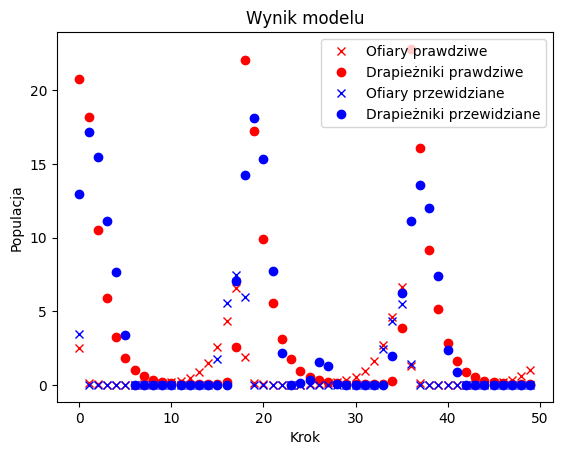

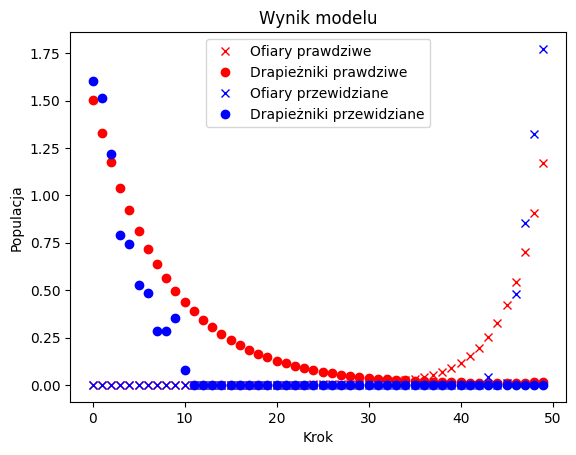

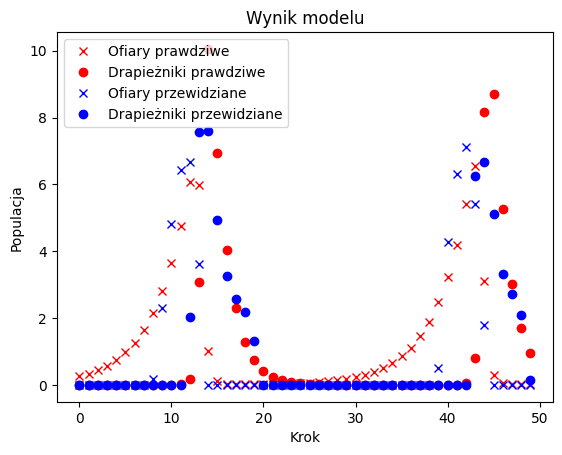

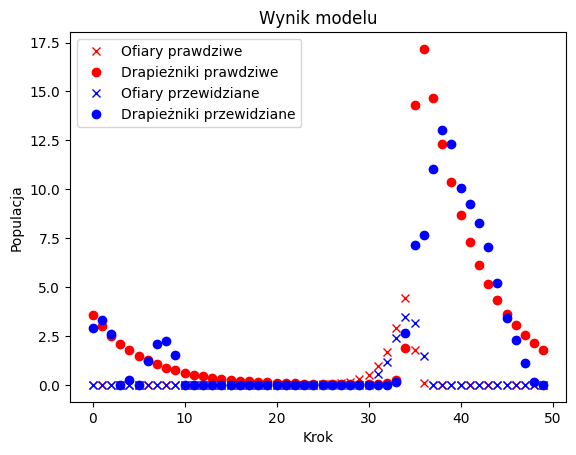

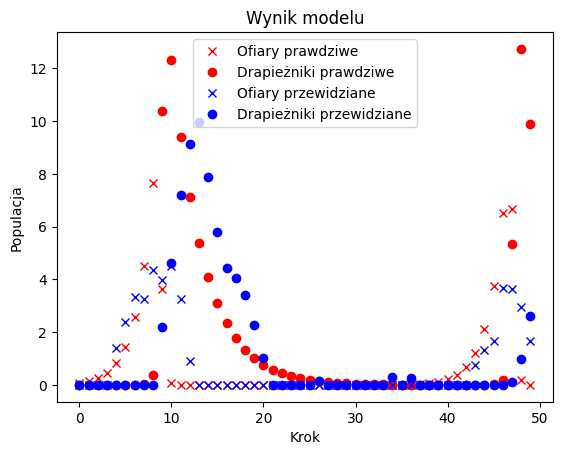

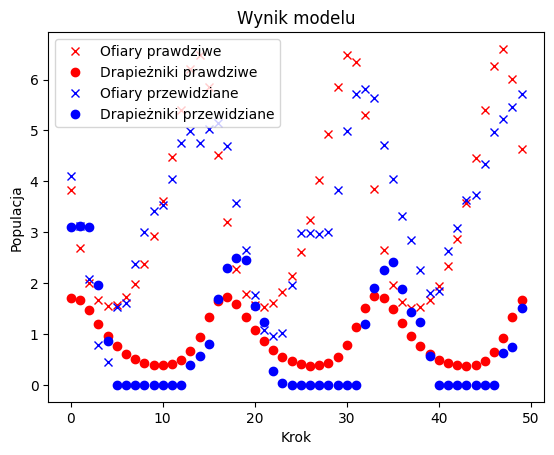

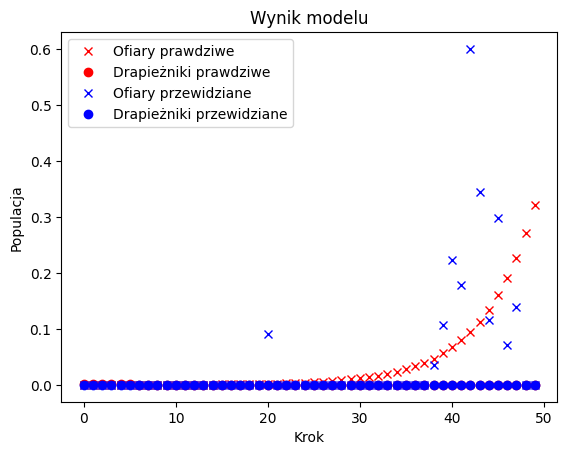

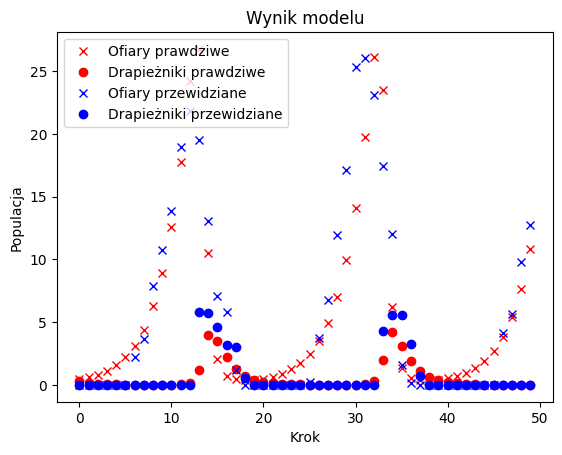

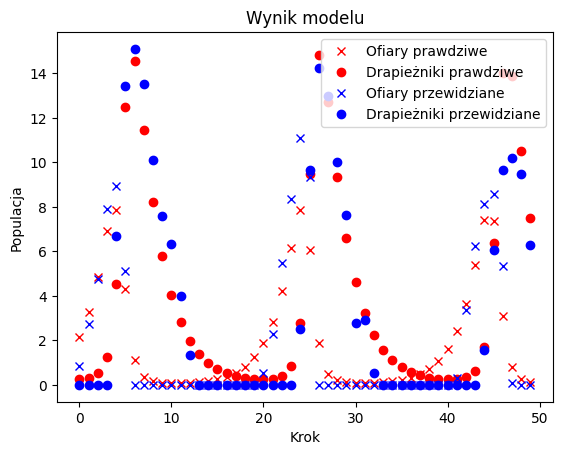

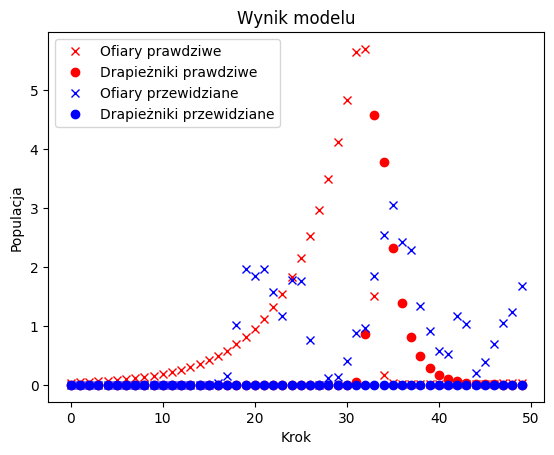

tensor(2.1845, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 13:
Średni błąd:  1.3846275017925476


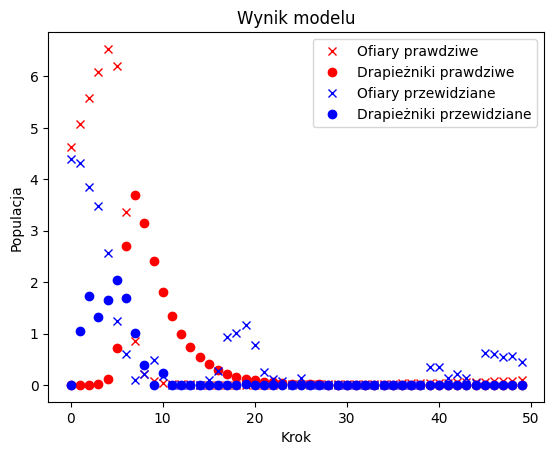

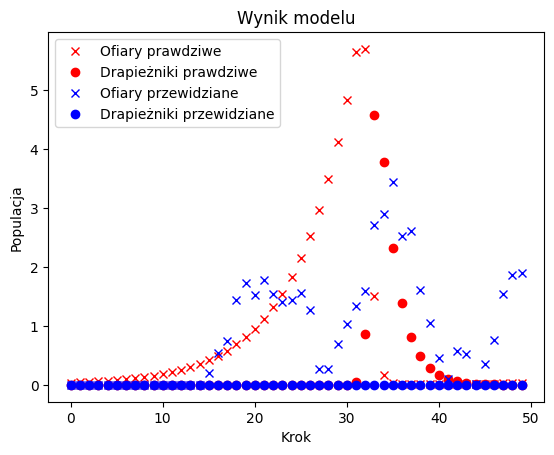

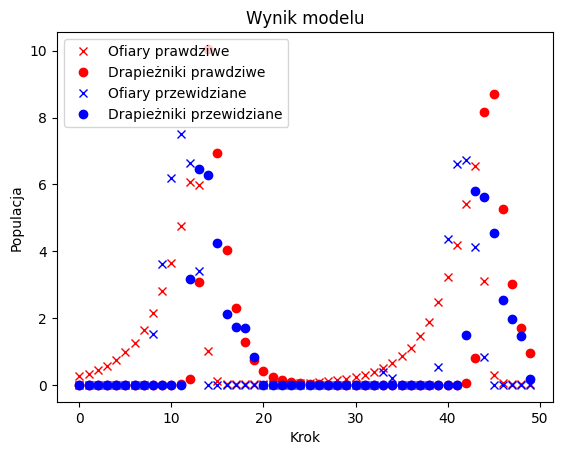

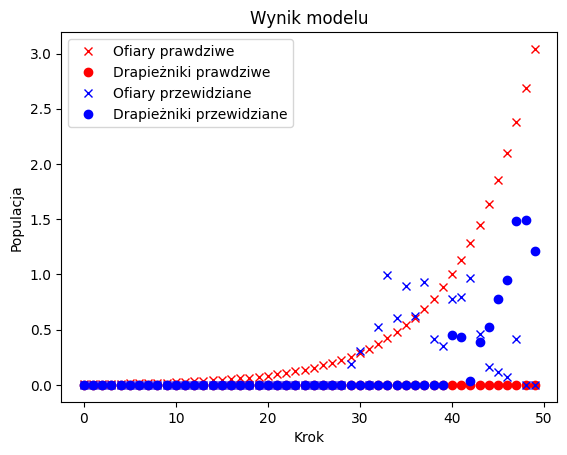

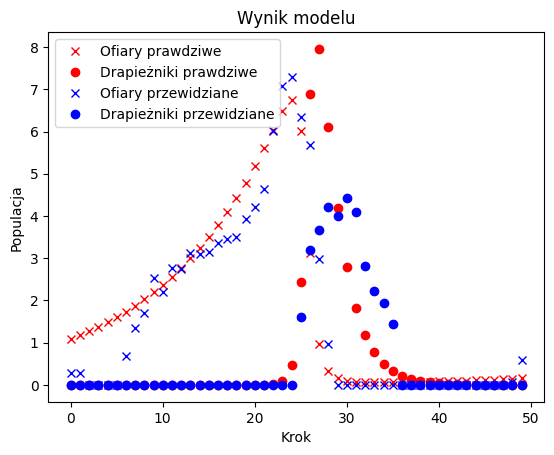

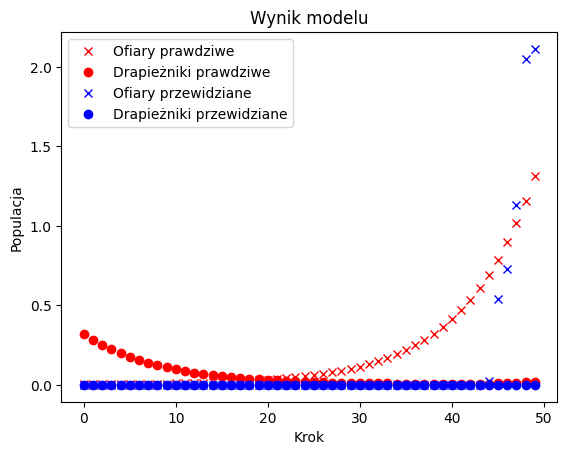

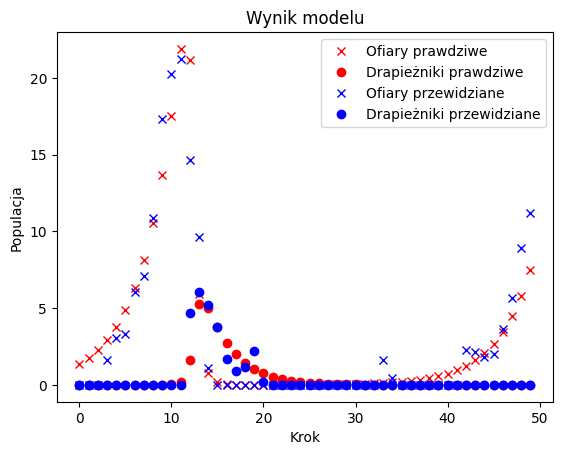

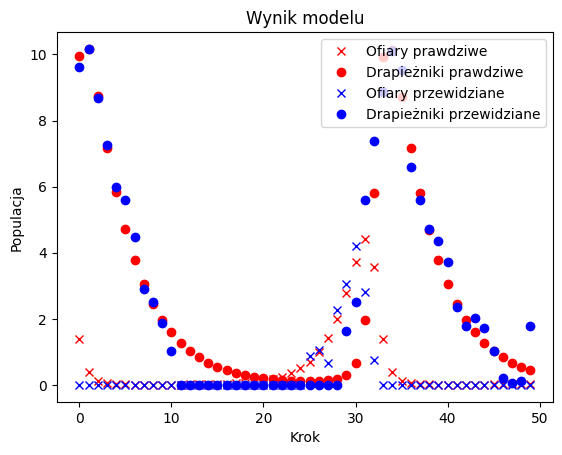

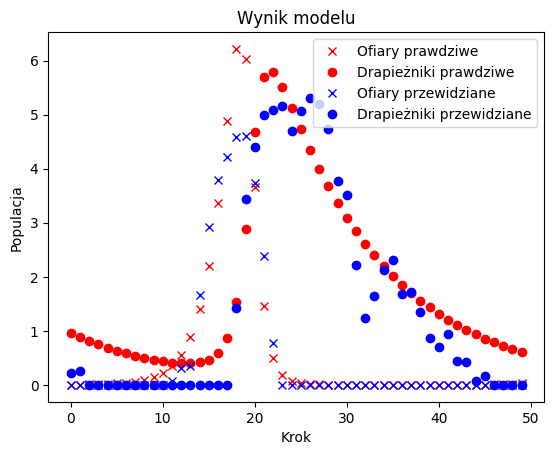

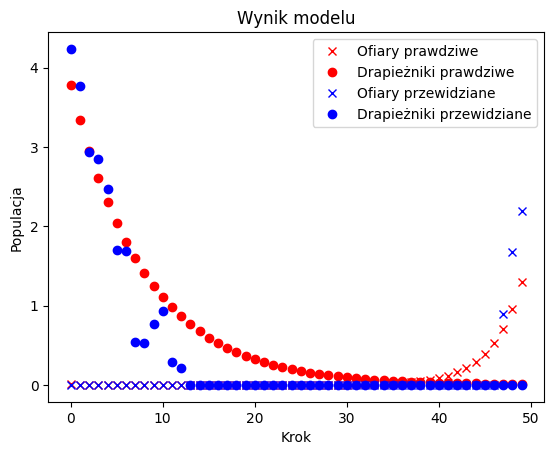

tensor(2.1332, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 14:
Średni błąd:  1.342672925455199


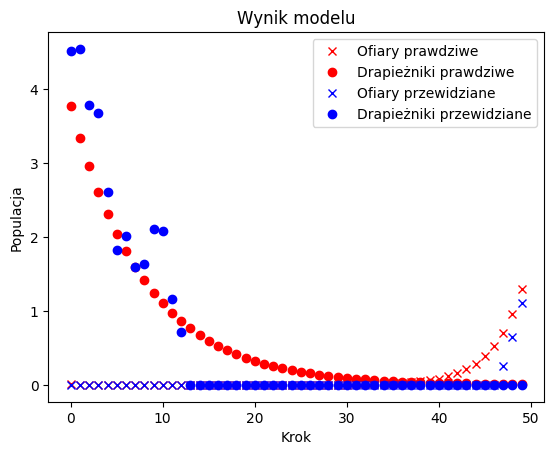

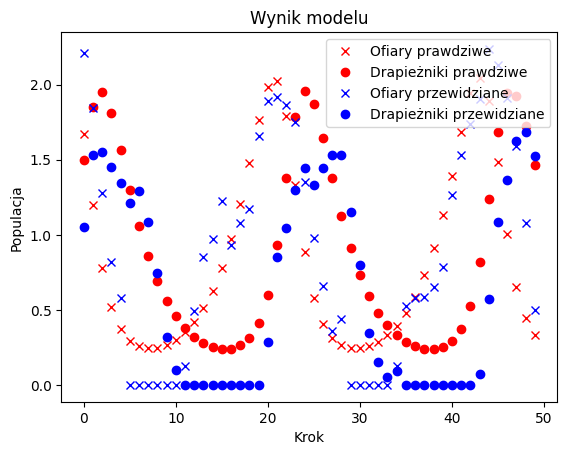

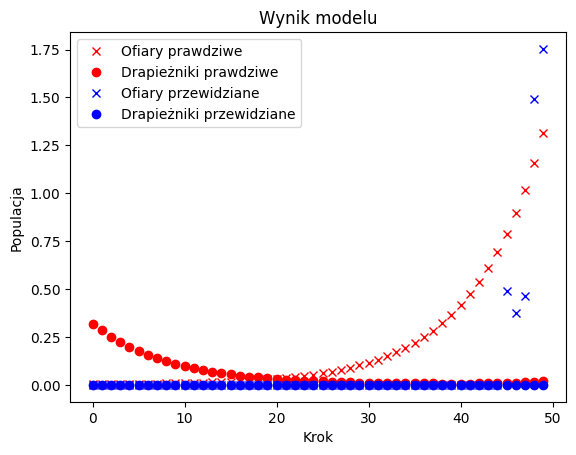

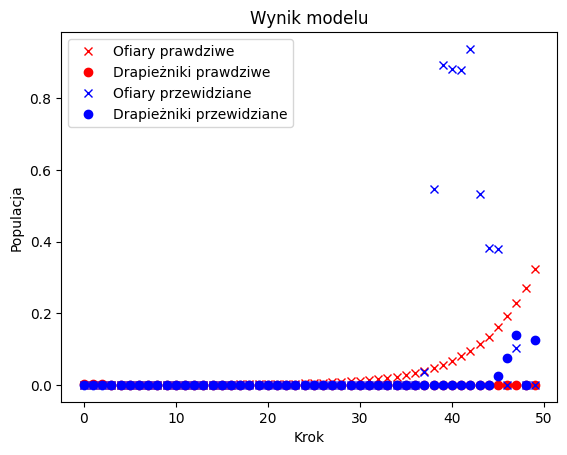

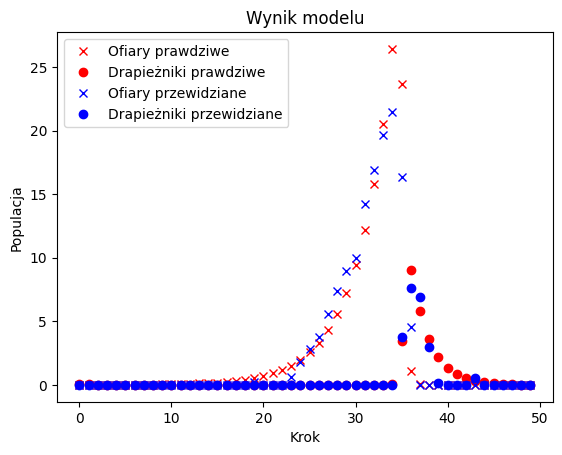

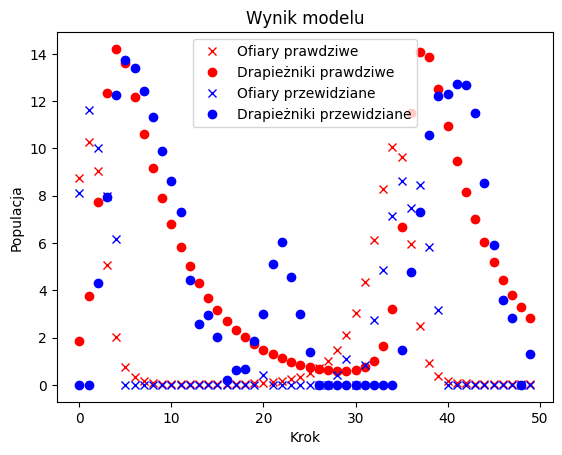

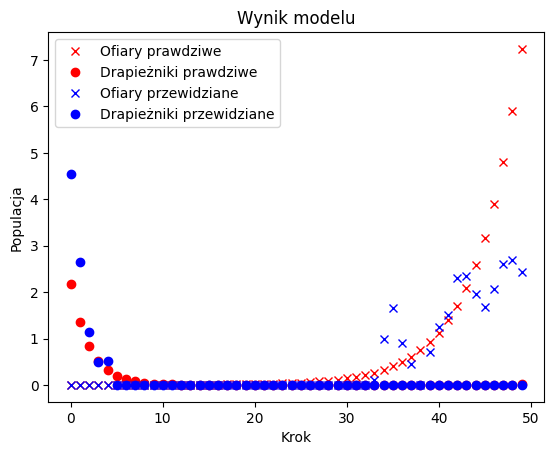

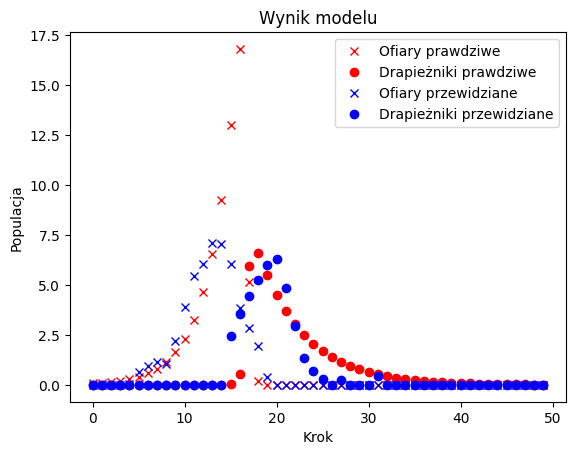

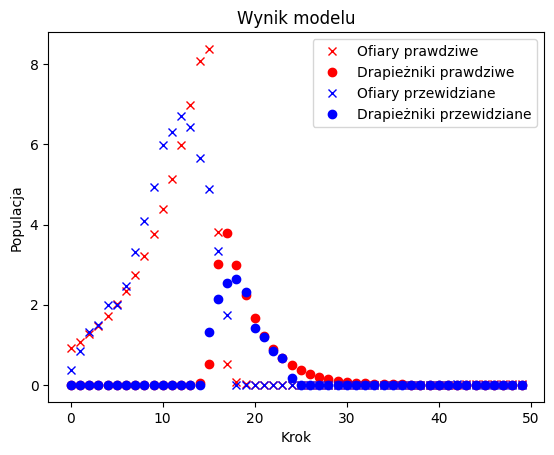

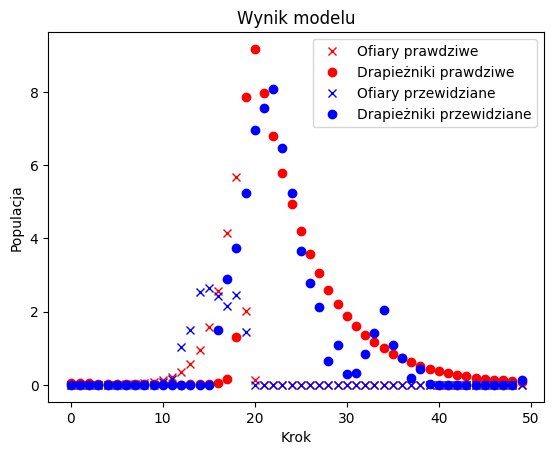

tensor(2.0790, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 15:
Średni błąd:  1.2782015810539447


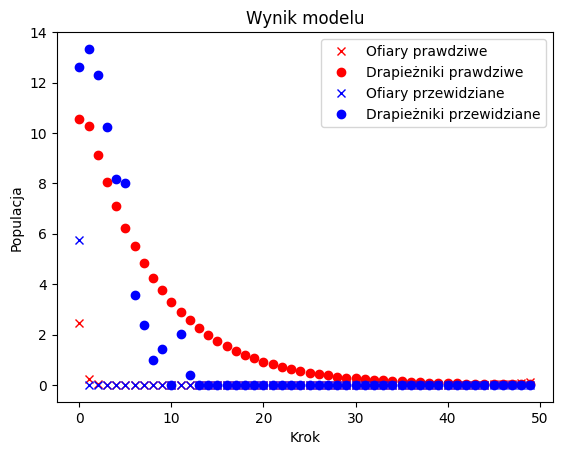

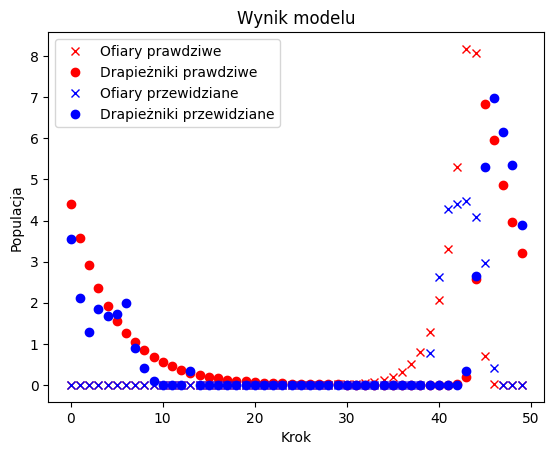

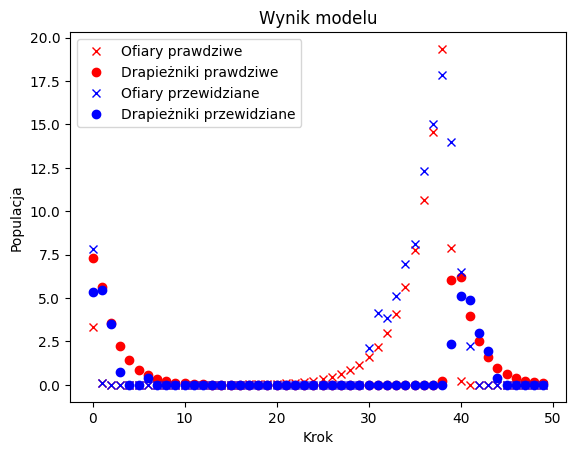

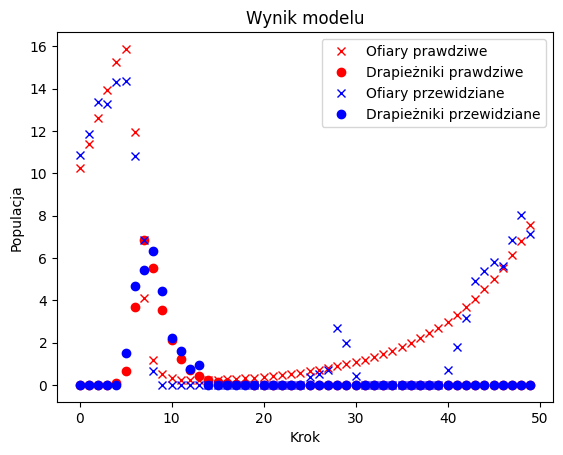

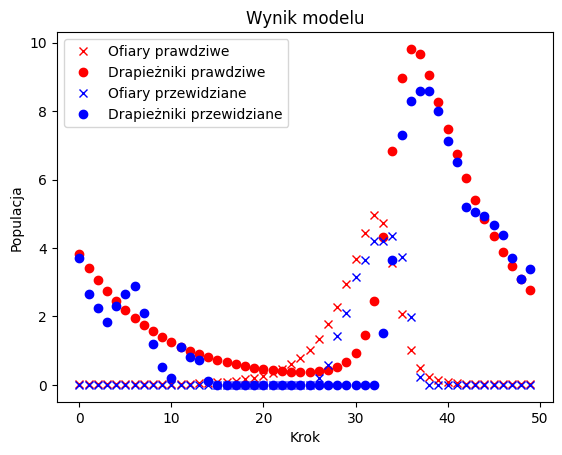

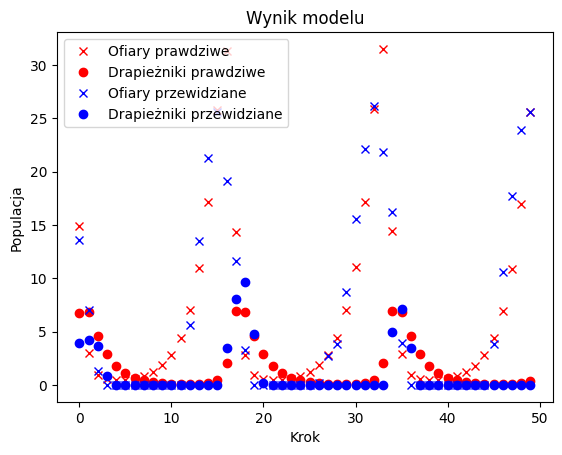

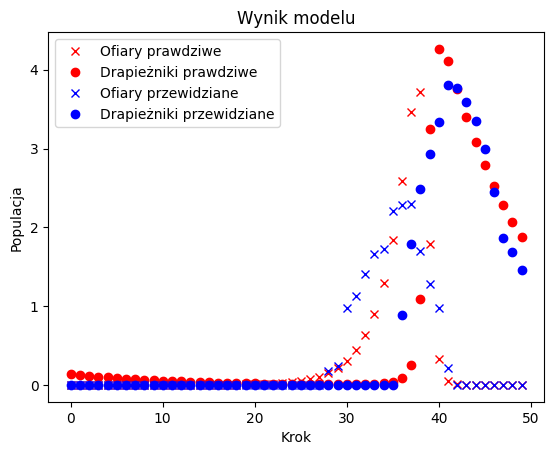

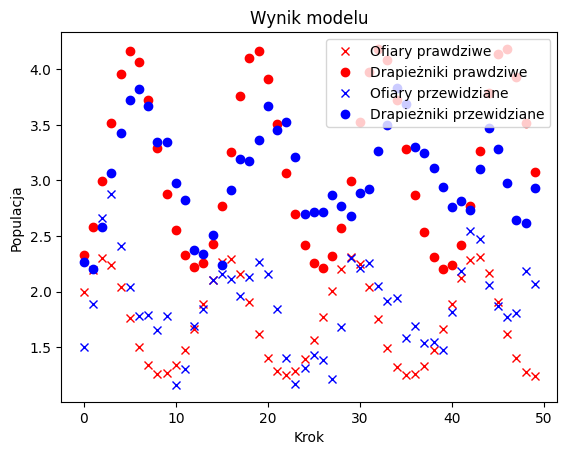

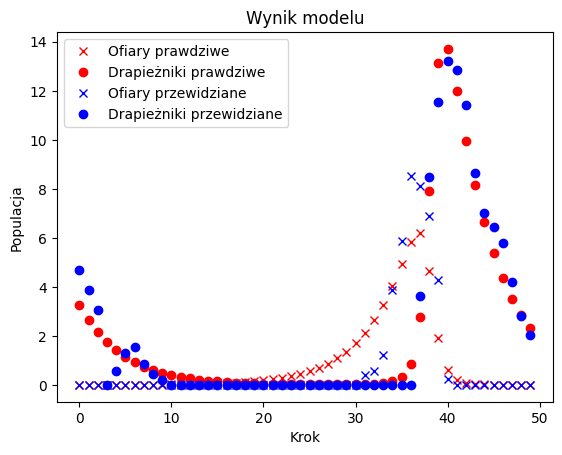

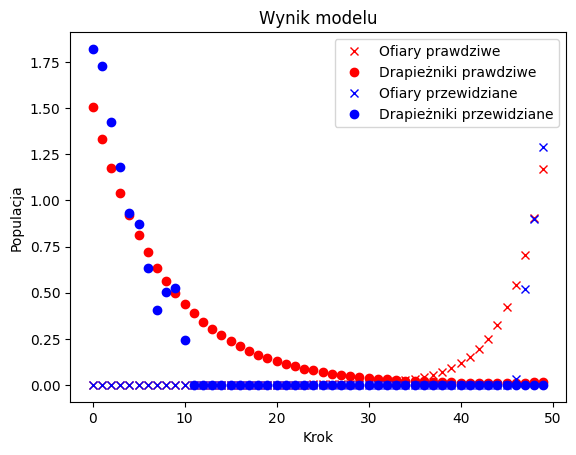

tensor(2.0067, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 16:
Średni błąd:  1.231354853058685


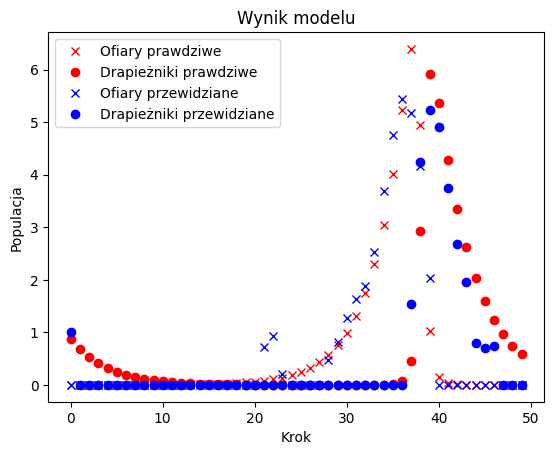

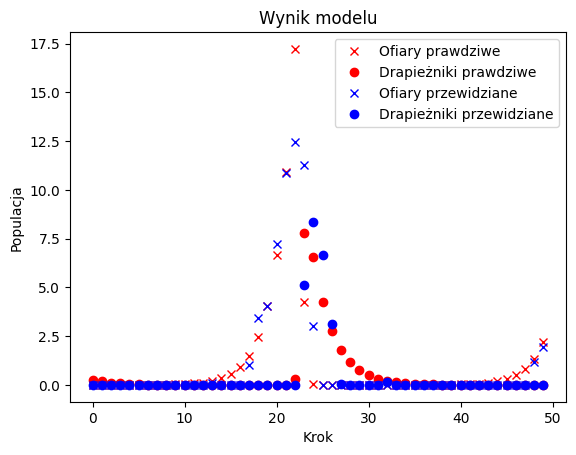

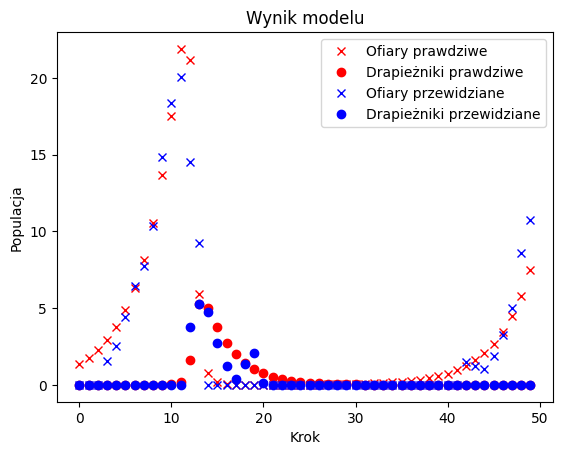

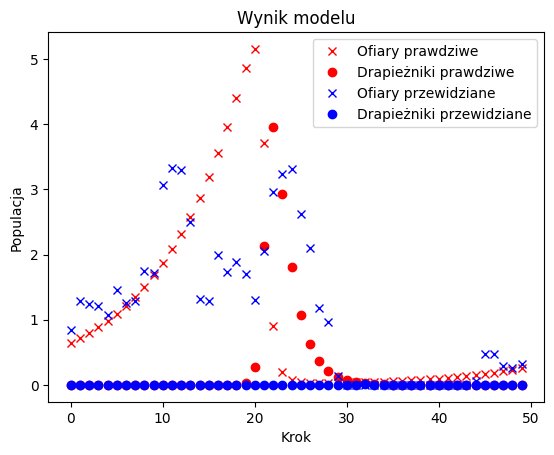

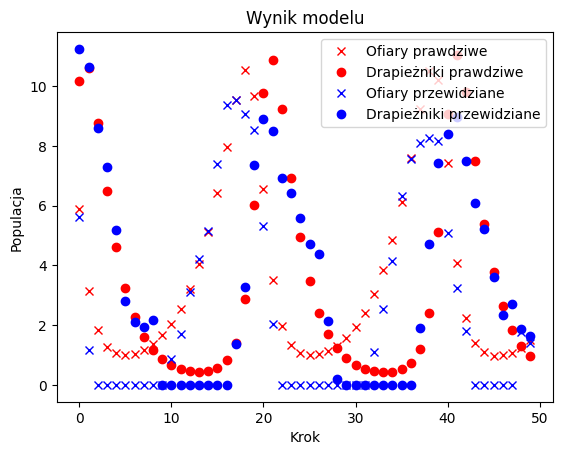

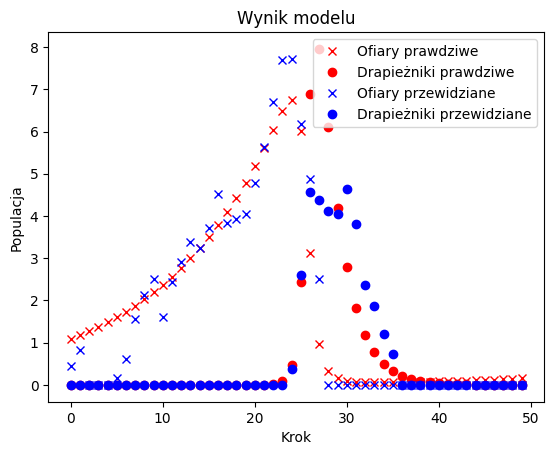

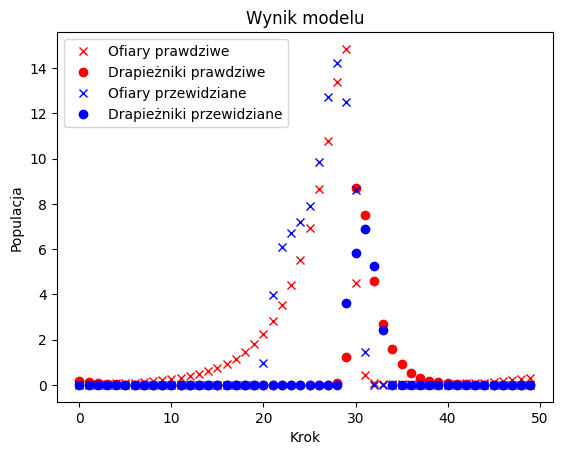

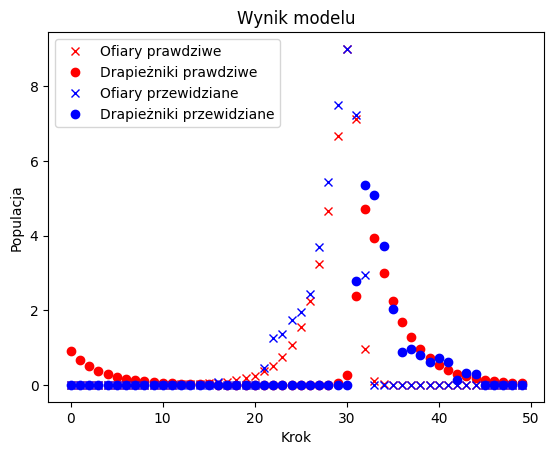

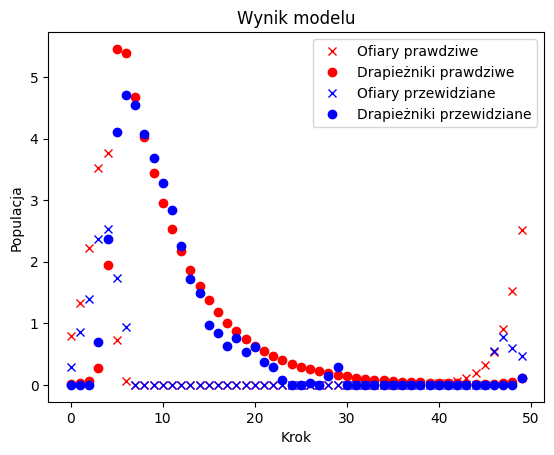

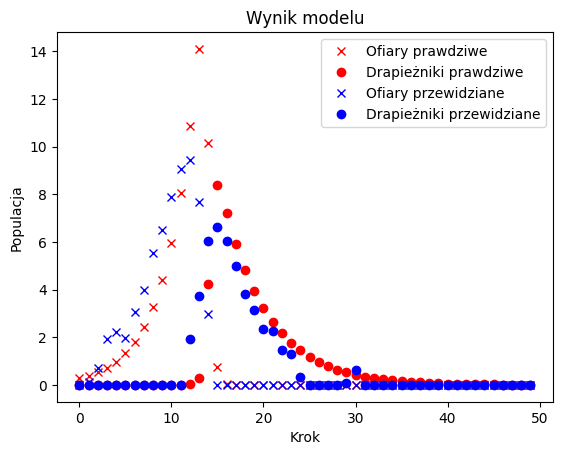

tensor(2.0273, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 17:
Średni błąd:  1.1803118482198032


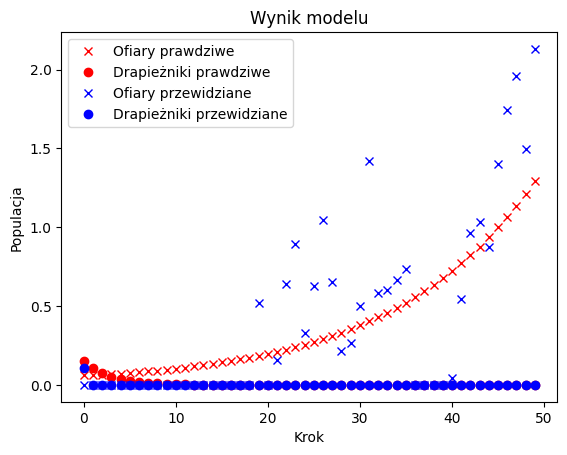

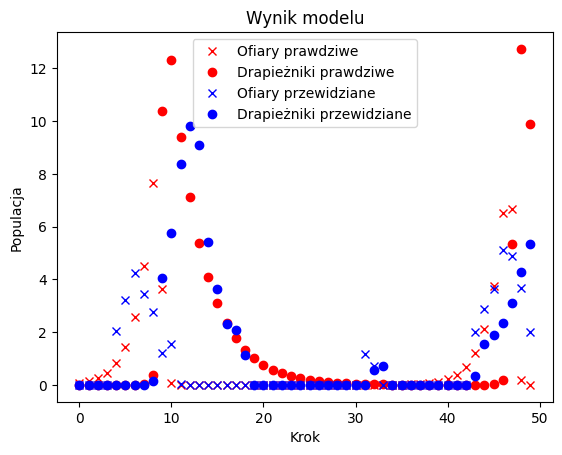

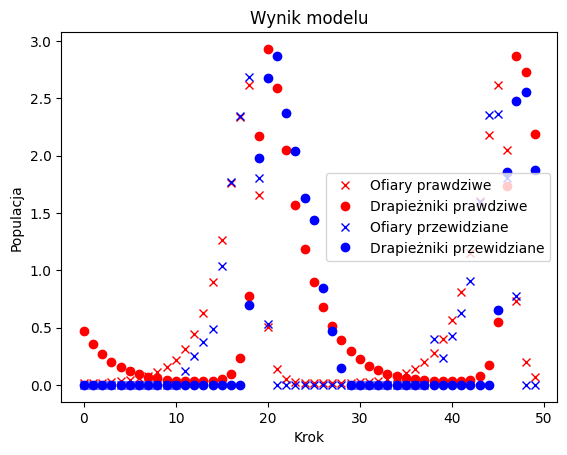

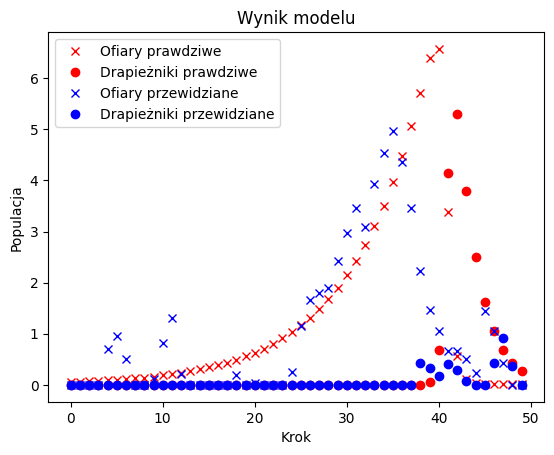

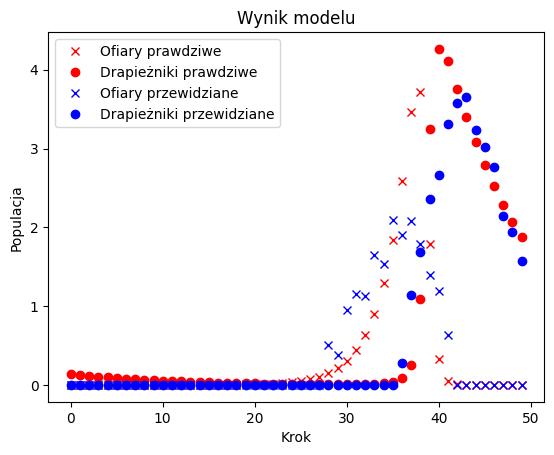

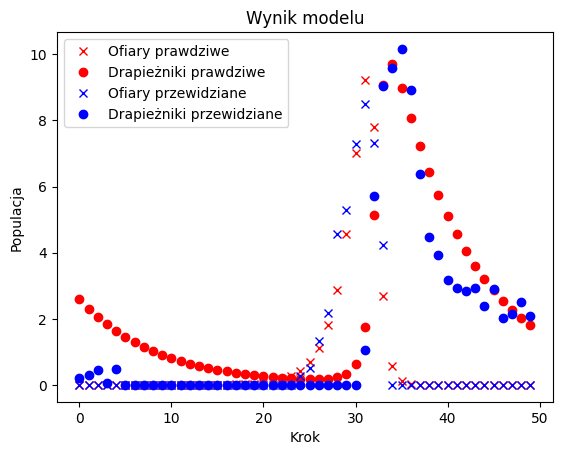

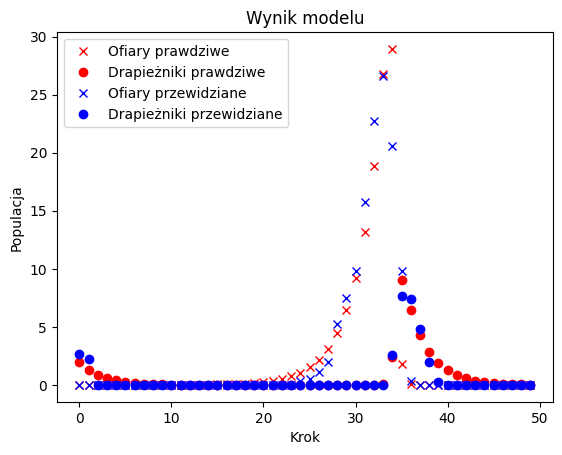

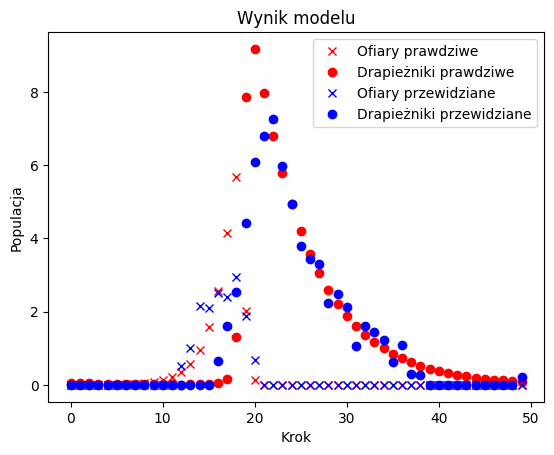

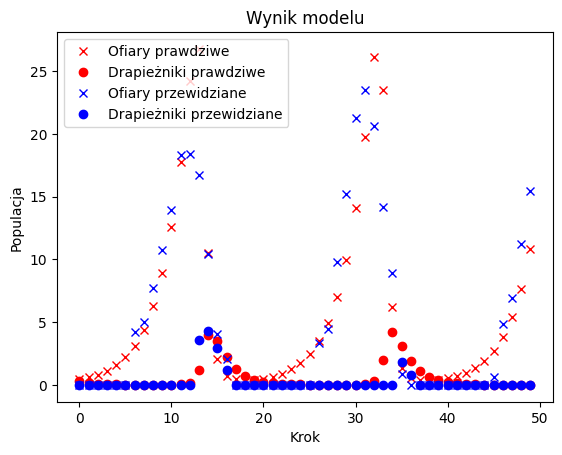

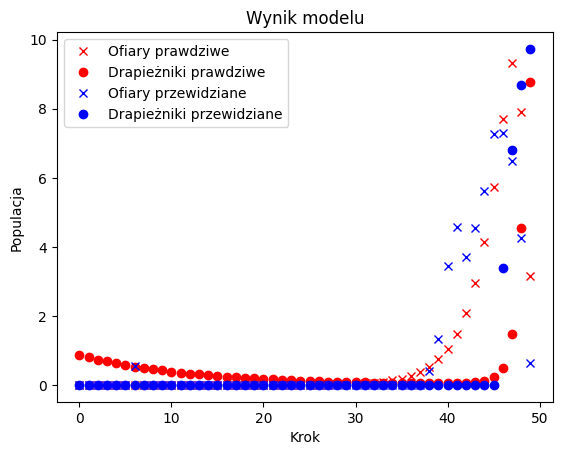

tensor(1.9785, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 18:
Średni błąd:  1.1749836572580599


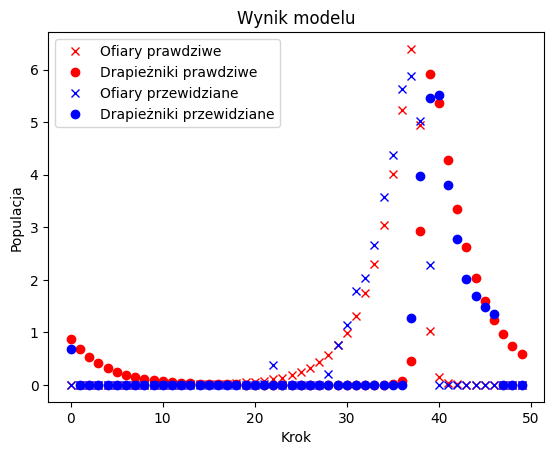

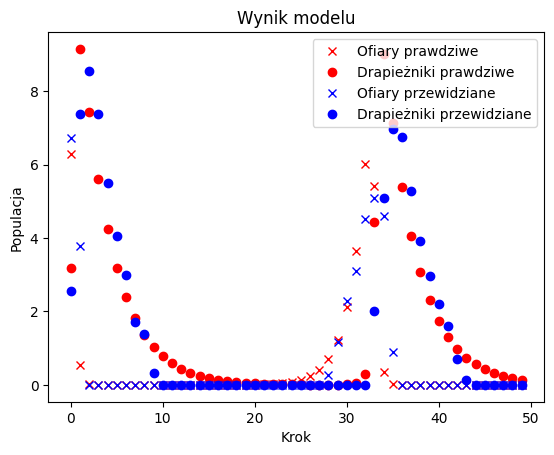

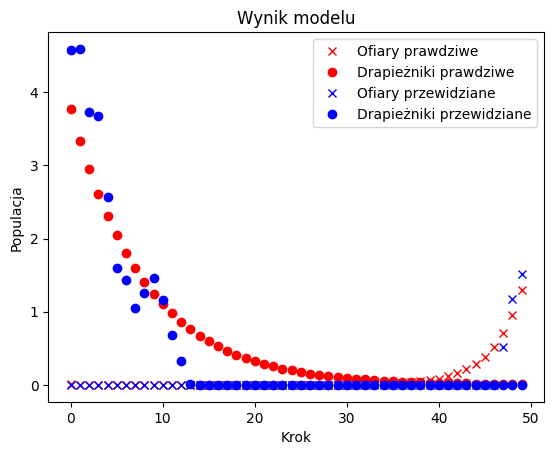

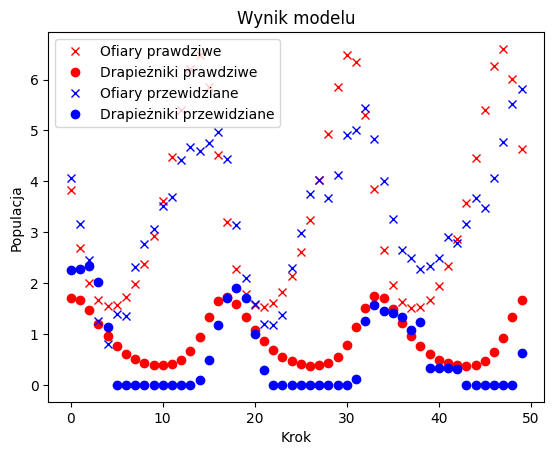

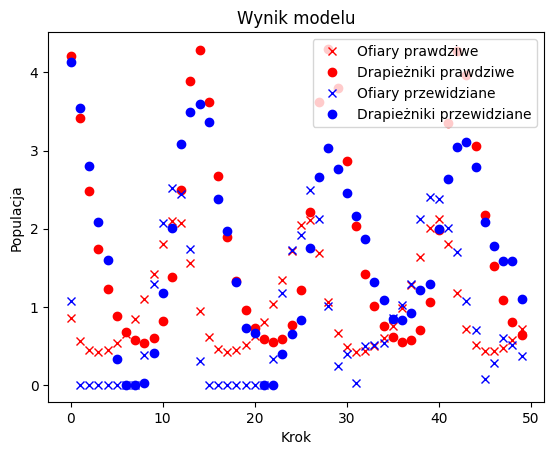

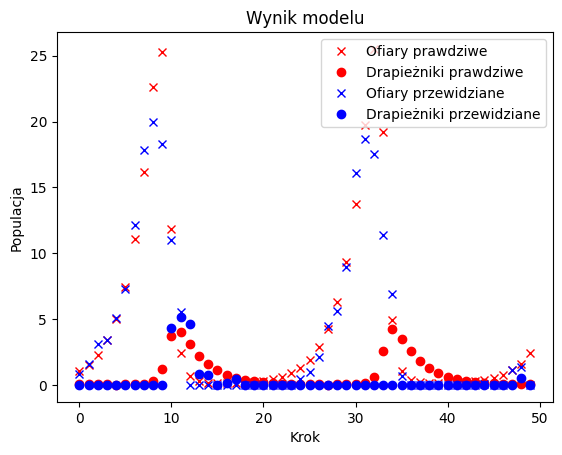

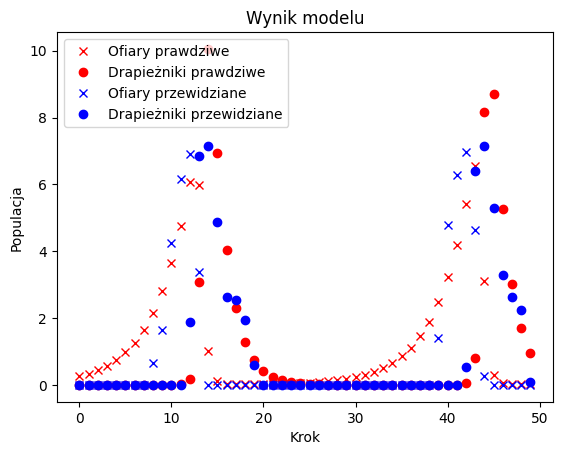

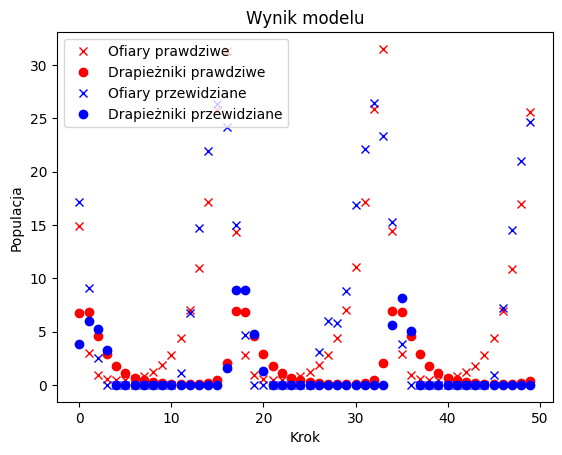

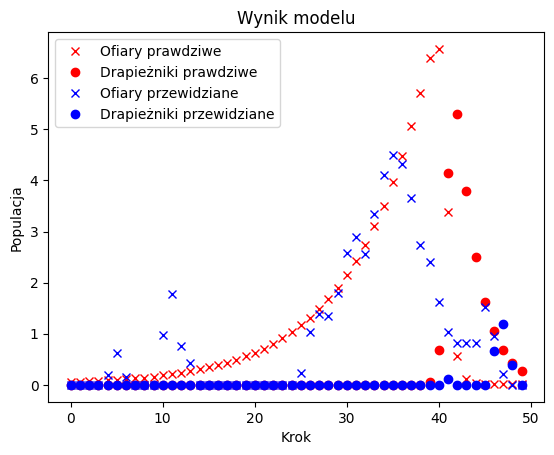

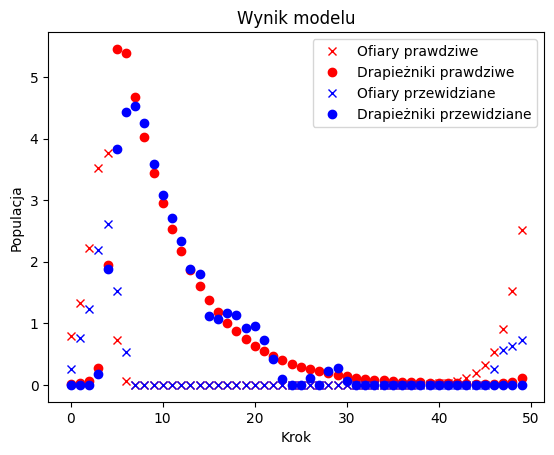

tensor(1.9515, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 19:
Średni błąd:  1.1093863789233351


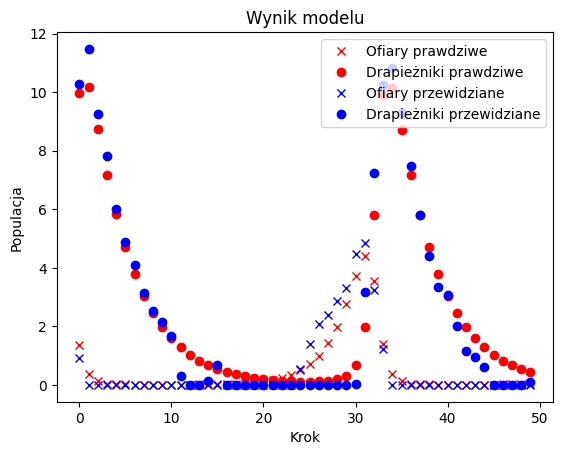

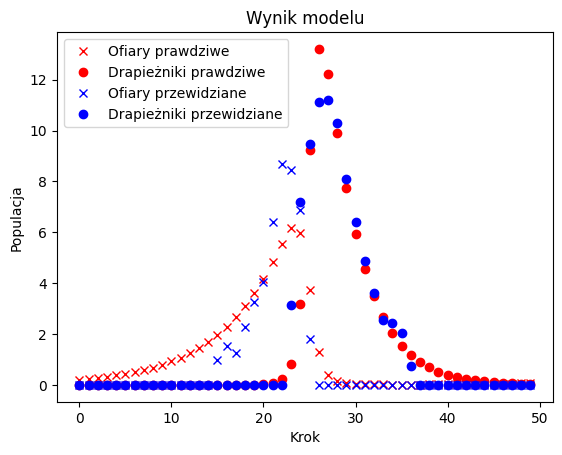

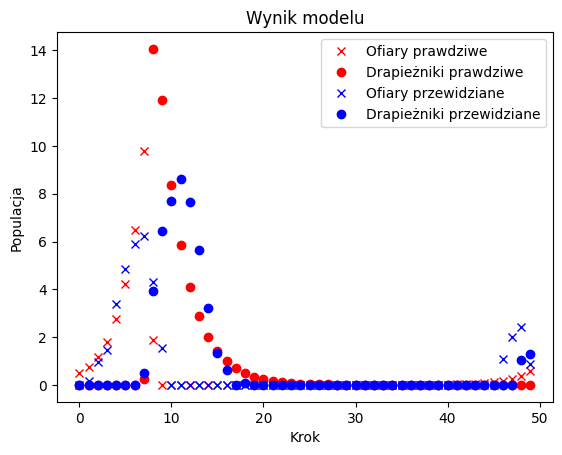

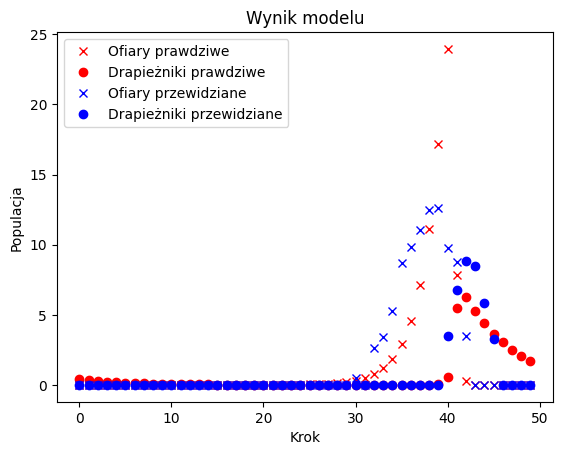

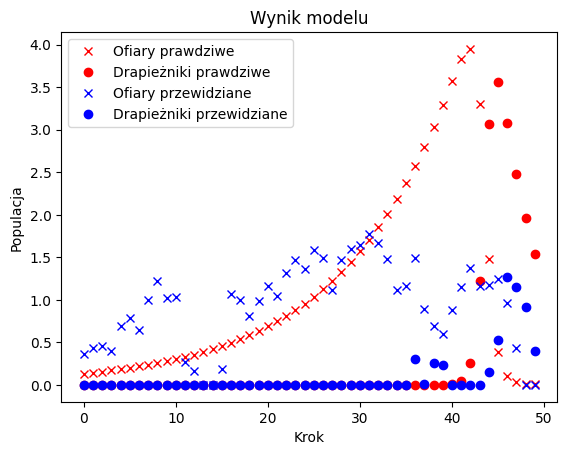

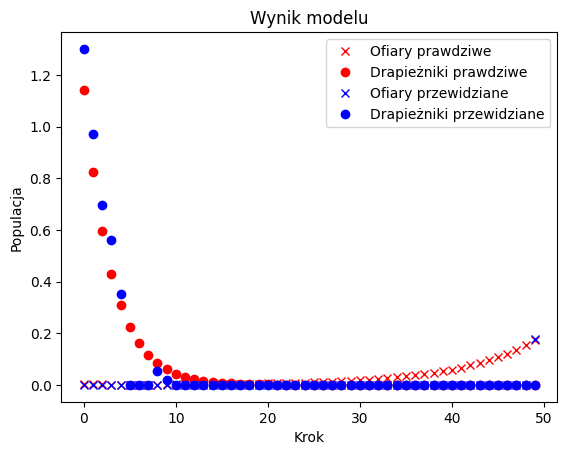

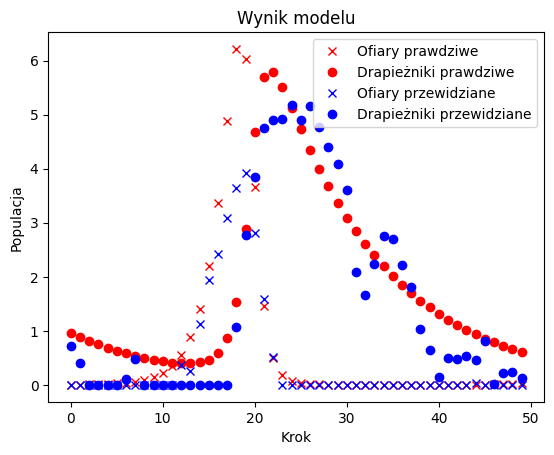

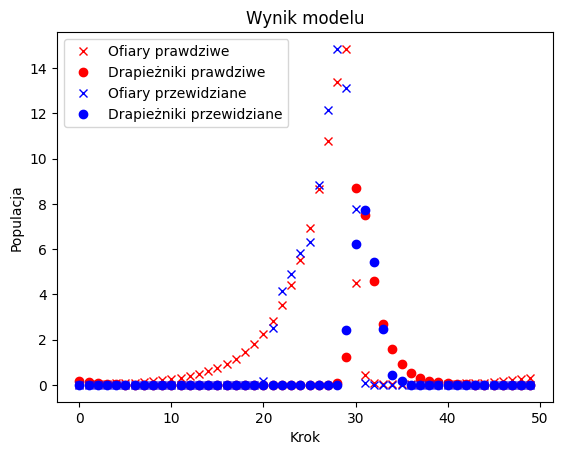

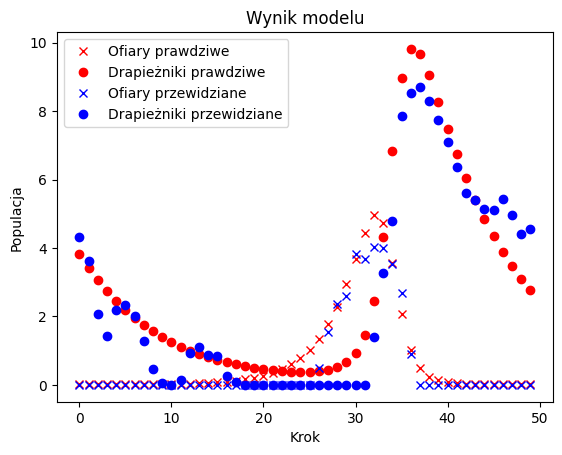

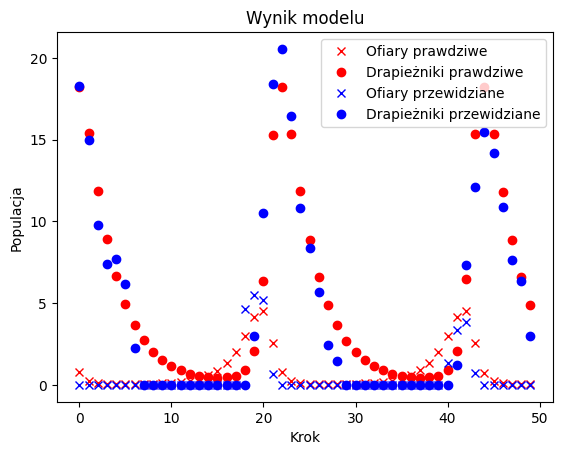

tensor(1.9407, dtype=torch.float64, grad_fn=<DivBackward0>)
EPOCH 20:
Średni błąd:  1.0826389141218726


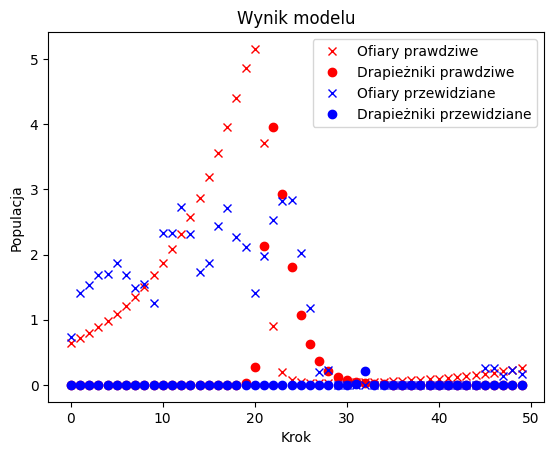

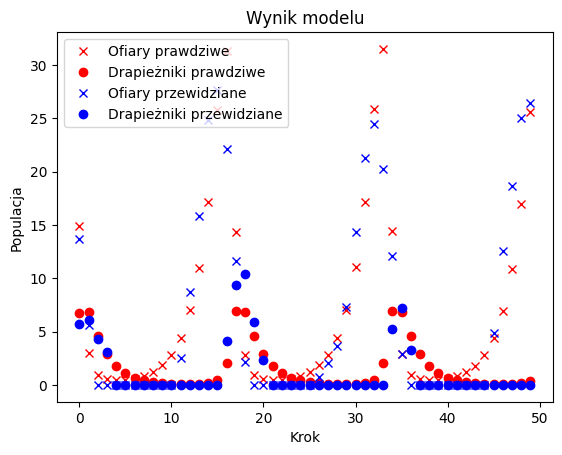

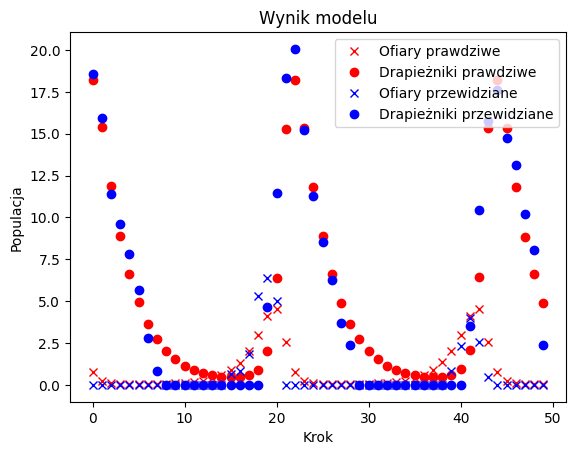

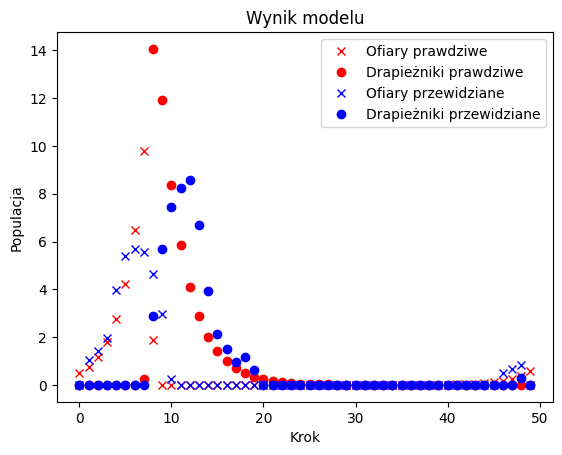

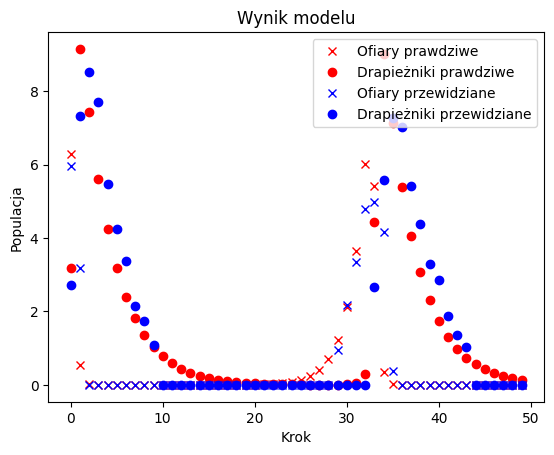

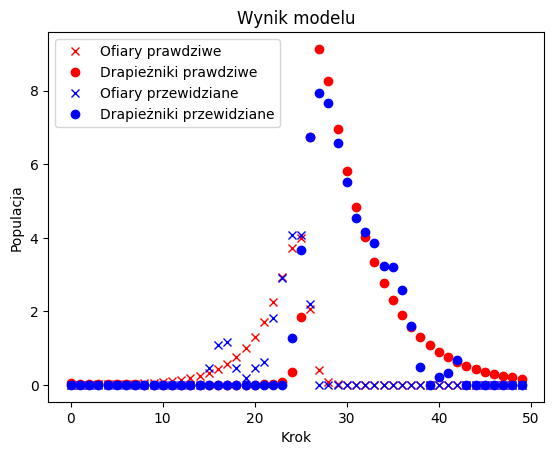

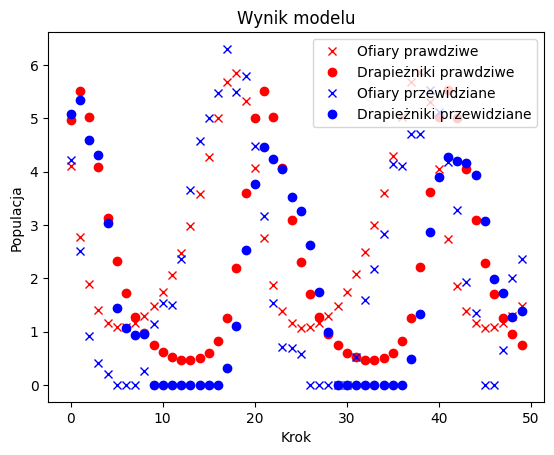

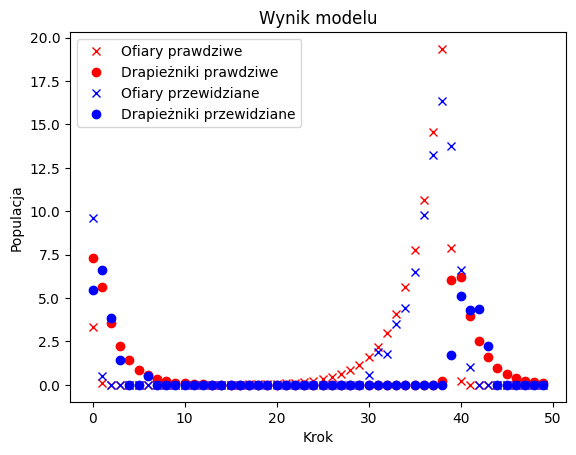

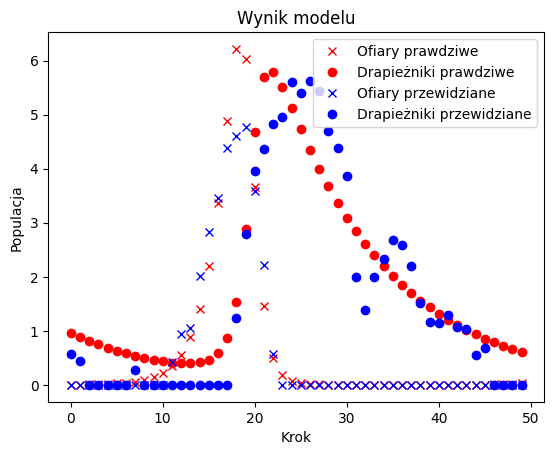

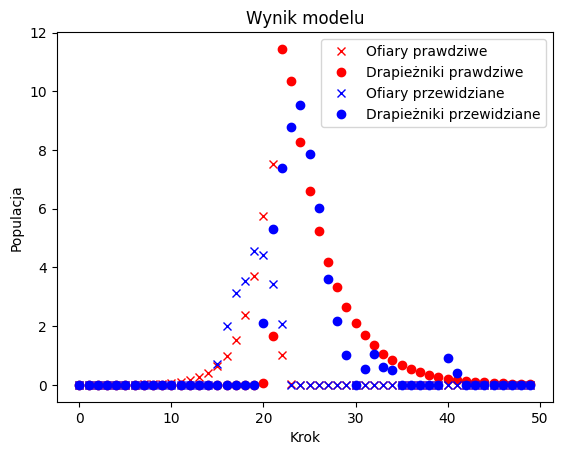

tensor(1.9572, dtype=torch.float64, grad_fn=<DivBackward0>)


In [9]:
for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)

    # We don't need gradients on to do reporting
    model.train(False)

    running_validation_loss = 0.0
    for i, validation_data in enumerate(test_dataloader):
        validation_inputs, validation_labels = validation_data
        validation_outputs = model(validation_inputs)
        validation_loss = loss_fn(validation_outputs, validation_labels)
        running_validation_loss += validation_loss
        
        prawdziwe = validation_labels.detach().numpy()[0]
        przewidziane = validation_outputs.detach().numpy()[0]
        prawdziwe = np.reshape(prawdziwe, (2, k), order = 'F')
        przewidziane = np.reshape(przewidziane, (2, k), order = 'F')
        x_0, y_0 = prawdziwe
        x_1, y_1 = przewidziane
        
        plt.plot(x_0, 'xr', label = 'Ofiary prawdziwe')
        plt.plot(y_0, 'or', label = 'Drapieżniki prawdziwe')
        plt.plot(x_1, 'xb', label = 'Ofiary przewidziane')
        plt.plot(y_1, 'ob', label = 'Drapieżniki przewidziane')
        plt.title("Wynik modelu")
        plt.xlabel('Krok')
        plt.ylabel('Populacja')
        plt.legend()

        plt.show()

    avg_validation_loss = running_validation_loss / len(test_dataloader)

    # Log the running loss averaged per batch
    # for both training and validation
    print(avg_validation_loss)
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training': avg_loss, 'Validation': avg_validation_loss},
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_validation_loss < best_validation_loss:
        best_validation_loss = avg_validation_loss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        # torch.save(model.state_dict(), model_path)

    epoch_number += 1
